In [1]:
import pandas as pd
import math

In [2]:
DATA_DIR = '/Users/39388/Downloads/'

In [3]:
all_data = pd.read_csv(DATA_DIR + 'all_matches_modified.csv')

all_data["total_runs"] = all_data['runs_off_bat'].astype(int) + all_data["extras"]
all_data["runs_conceded_bowler"] = all_data['runs_off_bat'].astype(int) + all_data["wides"] + all_data["noballs"]+ all_data["penalty"]

all_data_2020 = all_data[all_data.season.isin(['2019/2020','2020/21'])]
all_data.loc[all_data['start_date'].str.contains('2020'), 'season'] = '2020'
all_data_2020 = all_data[all_data.season.isin(['2020'])]

all_data_2021 = all_data[all_data.season.isin(['2019/2020','2020/21','2021/22'])]
all_data.loc[all_data['start_date'].str.contains('2021'), 'season'] = '2021'
all_data_2021 = all_data[all_data.season.isin(['2021'])]

all_data_2022 = all_data[all_data.season.isin(['2019/2020','2020/21','2021/22','2022'])]
all_data.loc[all_data['start_date'].str.contains('2022'), 'season'] = '2022'
all_data_2022 = all_data[all_data.season.isin(['2022'])]



In [4]:
all_data_2020


,Unnamed: 0,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,...,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,is_four,is_six,total_runs,runs_conceded_bowler
13173,13173,1211642,2020,2020-02-20,National Stadium,1,0.1,Islamabad United,Quetta Gladiators,C Munro,...,0.0,0.0,caught and bowled,C Munro,0.0,0.0,False,False,0,0.0
13174,13174,1211642,2020,2020-02-20,National Stadium,1,0.2,Islamabad United,Quetta Gladiators,DJ Malan,...,0.0,0.0,0,0,0.0,0.0,False,False,0,0.0
13175,13175,1211642,2020,2020-02-20,National Stadium,1,0.3,Islamabad United,Quetta Gladiators,DJ Malan,...,0.0,0.0,0,0,0.0,0.0,False,False,1,1.0
13176,13176,1211642,2020,2020-02-20,National Stadium,1,0.4,Islamabad United,Quetta Gladiators,L Ronchi,...,0.0,0.0,0,0,0.0,0.0,True,False,4,4.0
13177,13177,1211642,2020,2020-02-20,National Stadium,1,0.5,Islamabad United,Quetta Gladiators,L Ronchi,...,0.0,0.0,0,0,0.0,0.0,False,False,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33781,33781,1231146,2020,2020-11-17,National Stadium,2,17.6,Karachi Kings,Lahore Qalandars,Imad Wasim,...,0.0,0.0,0,0,0.0,0.0,False,False,1,1.0
33782,33782,1231146,2020,2020-11-17,National Stadium,2,18.1,Karachi Kings,Lahore Qalandars,Imad Wasim,...,0.0,0.0,0,0,0.0,0.0,False,False,0,0.0
33783,33783,1231146,2020,2020-11-17,National Stadium,2,18.2,Karachi Kings,Lahore Qalandars,Imad Wasim,...,0.0,0.0,0,0,0.0,0.0,False,False,1,1.0
33784,33784,1231146,2020,2020-11-17,National Stadium,2,18.3,Karachi Kings,Lahore Qalandars,Babar Azam,...,0.0,0.0,0,0,0.0,0.0,False,False,1,1.0


In [5]:
all_data.wicket_type.unique()

array(['caught', '0', 'bowled', 'lbw', 'caught and bowled', 'run out',
       'stumped', 'hit wicket', 'retired hurt', 'obstructing the field'],
      dtype=object)

# PCA 2022

In [6]:
all_data_2022.wicket_type.unique()

array(['0', 'caught', 'caught and bowled', 'bowled', 'stumped', 'run out',
       'lbw'], dtype=object)

In [7]:
runs_bowler = all_data_2022.groupby(["bowler"])["runs_conceded_bowler"].sum()
runs_bowler = runs_bowler.reset_index()
runs_bowler

,bowler,runs_conceded_bowler
0,Aamer Azmat,3.0
1,Aamer Yamin,113.0
2,Abbas Afridi,127.0
3,Ali Majid,33.0
4,Amad Butt,46.0
...,...,...
78,Zafar Gohar,21.0
79,Zahid Mahmood,49.0
80,Zahir Khan,67.0
81,Zaman Khan,387.0


In [8]:
deliveries_bowler = all_data_2022.groupby(["bowler"])["bowler"].count()
deliveries_bowler = deliveries_bowler.reset_index(name = "deliveries")
deliveries_bowler

,bowler,deliveries
0,Aamer Azmat,7
1,Aamer Yamin,70
2,Abbas Afridi,91
3,Ali Majid,25
4,Amad Butt,37
...,...,...
78,Zafar Gohar,19
79,Zahid Mahmood,42
80,Zahir Khan,44
81,Zaman Khan,299


In [9]:
all_data_2022.loc[all_data_2022['wicket_type'].str.contains('run out'), 'player_dismissed'] = '0'
                  
all_data_2022.loc[all_data_2022['wicket_type'].str.contains('run out'), 'wicket_type'] = '0'


wickets_bowler = all_data_2022[all_data_2022["player_dismissed"] != '0']  



In [10]:
wickets_bowler = wickets_bowler.groupby(["bowler"])["bowler"].count()
wickets_bowler = wickets_bowler.reset_index(name = "wickets")



,bowler,wickets
0,Aamer Yamin,1
1,Abbas Afridi,3
2,Amad Butt,1
3,Anwar Ali,2
4,Arshad Iqbal,2
...,...,...
66,Waqas Maqsood,12
67,Zahid Mahmood,1
68,Zahir Khan,2
69,Zaman Khan,18


In [11]:
bowler_stats = runs_bowler.merge(deliveries_bowler, how = "left")

In [12]:
bowler_stats = bowler_stats.merge(wickets_bowler, how="left")



In [13]:
bowler_stats.sort_values('wickets',ascending=False)

,bowler,runs_conceded_bowler,deliveries,wickets
66,Shaheen Shah Afridi,402.0,330,20.0
65,Shadab Khan,207.0,197,19.0
81,Zaman Khan,387.0,299,18.0
68,Shahnawaz Dhani,336.0,223,17.0
22,Haris Rauf,470.0,319,16.0
...,...,...,...,...
50,Mohammad Taha,32.0,25,NaN
54,Muhammad Musa,33.0,12,NaN
57,PR Brown,61.0,42,NaN
70,Sohail Khan,96.0,43,NaN


In [14]:
bowler_stats = bowler_stats[bowler_stats["deliveries"] > bowler_stats["deliveries"].median()]

In [15]:
bowler_stats["average"] = round(bowler_stats["runs_conceded_bowler"] / bowler_stats["wickets"],2)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

def draw_plot(fig_size_x = 15,
              fig_size_y = 10,
              tick_params_labelsize = 14,
             xlabel_name_fontsize = 20,
             ylabel_name_fontsize = 20,
             title_name_fontsize = 20,
             xlabel_name = "",
             ylabel_name = "",
             title_name = ""):
    
    #get current figure 
    fig=plt.gcf()
    
    #set the size of the figure
    fig.set_size_inches(fig_size_x,fig_size_y)

    #get axes of the current figure 
    ax =  fig.gca()

    # set the label size of the ticks of the axes
    ax.tick_params(labelsize=tick_params_labelsize)

    # set the label size of the x axis
    ax.set_xlabel(xlabel_name,fontsize = xlabel_name_fontsize)

    # set the label size of the y axis
    ax.set_ylabel(ylabel_name,fontsize = ylabel_name_fontsize)

     # set the title of the plot
    ax.set_title(title_name,fontsize = title_name_fontsize)

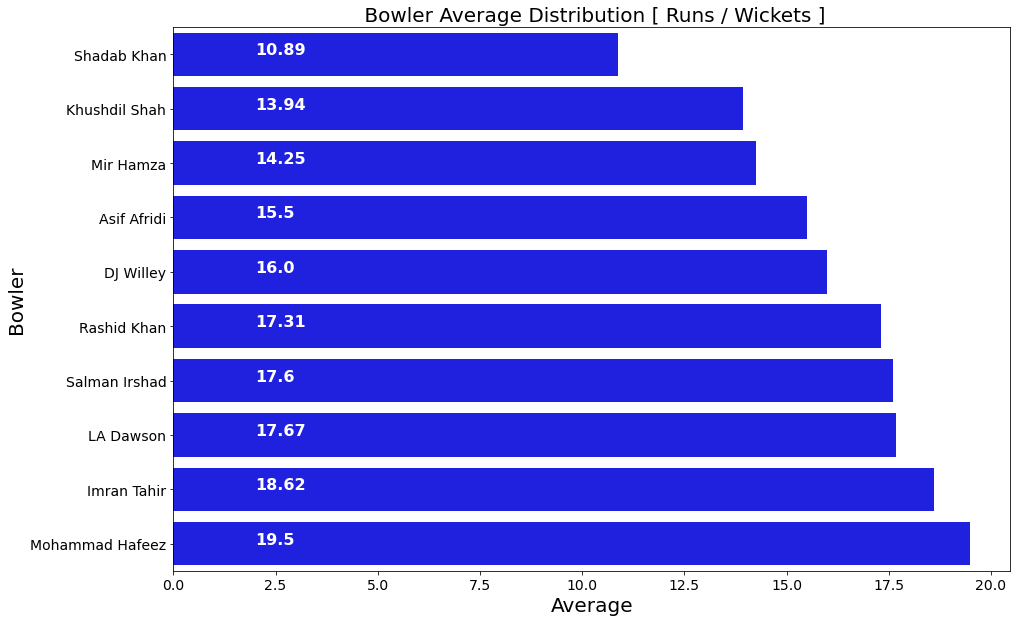

In [17]:
bowler_stats = bowler_stats.sort_values(by = "average",ascending = True)
xlabel_name = "Average"
ylabel_name = "Bowler"
title_name = " Bowler Average Distribution [ Runs / Wickets ]"

sns.barplot( x = "average" , y = "bowler" , data = bowler_stats.head(10), color = "blue")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(bowler_stats.head(10)["average"].values):
    ax.text(2, i, v,fontsize=16,color='white',weight='bold')

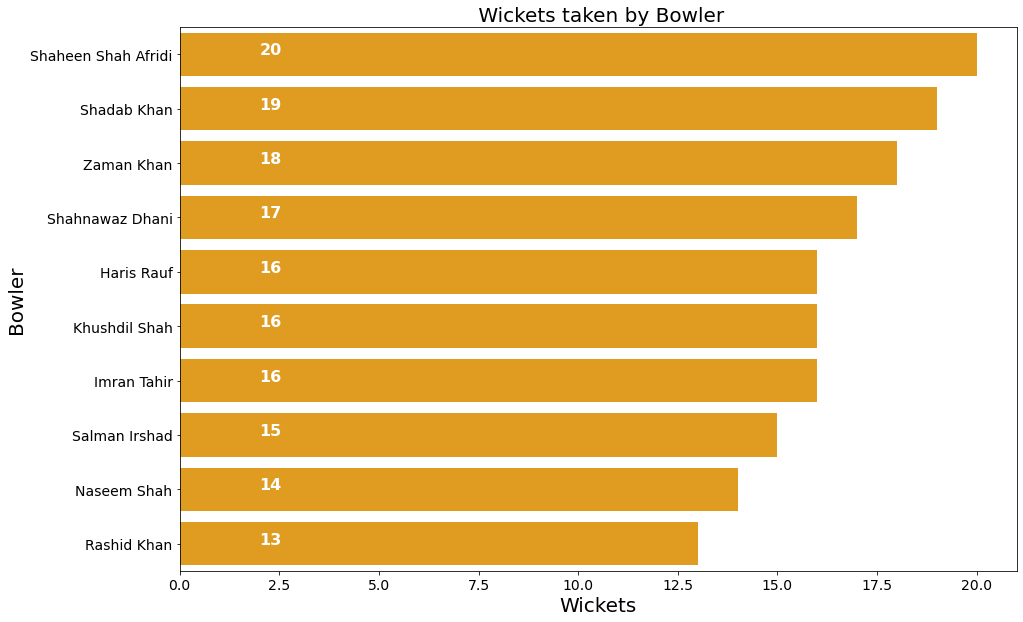

In [18]:
wickets_bowler = wickets_bowler.sort_values(by = "wickets",ascending = False)
xlabel_name = "Wickets"
ylabel_name = "Bowler"
title_name = " Wickets taken by Bowler"

sns.barplot( x = "wickets" , y = "bowler" , data = wickets_bowler.head(10), color = "orange")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(wickets_bowler.head(10)["wickets"].values):
    ax.text(2, i, v,fontsize=16,color='white',weight='bold')

In [19]:
bowler_stats["strike_rate"] = round(bowler_stats["deliveries"] / bowler_stats["wickets"],2)

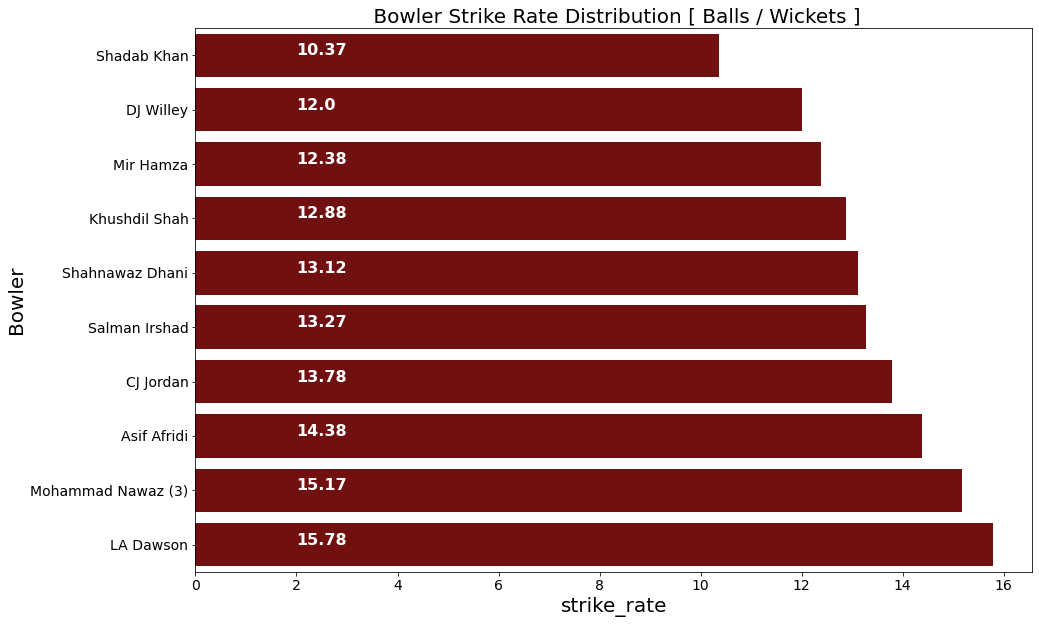

In [20]:
bowler_stats = bowler_stats.sort_values(by = "strike_rate",ascending = True)
xlabel_name = "strike_rate"
ylabel_name = "Bowler"
title_name = " Bowler Strike Rate Distribution [ Balls / Wickets ]"

sns.barplot( x = "strike_rate" , y = "bowler" , data = bowler_stats.head(10), color = "maroon")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(bowler_stats.head(10)["strike_rate"].values):
    ax.text(2, i, v,fontsize=16,color='white',weight='bold')

In [21]:
bowler_stats["econ"] = round((bowler_stats["runs_conceded_bowler"] / bowler_stats["deliveries"])*6,2)

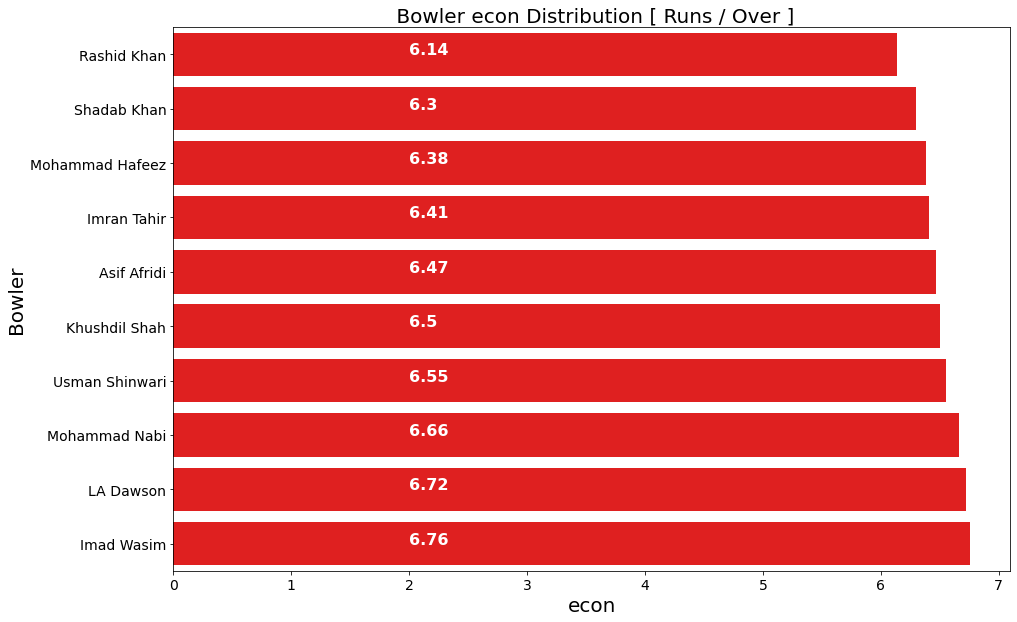

In [22]:
bowler_stats = bowler_stats.sort_values(by = "econ",ascending = True)
xlabel_name = "econ"
ylabel_name = "Bowler"
title_name = " Bowler econ Distribution [ Runs / Over ]"

sns.barplot( x = "econ" , y = "bowler" , data = bowler_stats.head(10), color = "red")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(bowler_stats.head(10)["econ"].values):
    ax.text(2, i, v,fontsize=16,color='white',weight='bold')

In [23]:
bowler_stats["deliveries"].median()

156.0

In [24]:
bowler_stats.sort_values(by="deliveries",ascending = False)

,bowler,runs_conceded_bowler,deliveries,wickets,average,strike_rate,econ
66,Shaheen Shah Afridi,402.0,330,20.0,20.10,16.50,7.31
22,Haris Rauf,470.0,319,16.0,29.38,19.94,8.84
81,Zaman Khan,387.0,299,18.0,21.50,16.61,7.77
30,Imran Tahir,298.0,279,16.0,18.62,17.44,6.41
76,Wahab Riaz,354.0,252,9.0,39.33,28.00,8.43
55,Naseem Shah,306.0,239,14.0,21.86,17.07,7.68
68,Shahnawaz Dhani,336.0,223,17.0,19.76,13.12,9.04
59,Rashid Khan,225.0,220,13.0,17.31,16.92,6.14
28,Imad Wasim,239.0,212,6.0,39.83,35.33,6.76
23,Hasan Ali,365.0,208,9.0,40.56,23.11,10.53


In [25]:
bowler_stats.columns

Index(['bowler', 'runs_conceded_bowler', 'deliveries', 'wickets', 'average',
       'strike_rate', 'econ'],
      dtype='object')

In [26]:
bowler_stats = bowler_stats[bowler_stats["deliveries"] > 50]

In [27]:
bowler_all_stats_4 = bowler_stats[['wickets', 'average','strike_rate', 'econ']]

In [28]:
bowler_all_stats_4 = bowler_all_stats_4.fillna(0)
bowler_all_stats_4.index =bowler_stats.bowler

In [3]:
from sklearn.preprocessing import scale


In [30]:
X

,wickets,average,strike_rate,econ
bowler,,,,
Rashid Khan,0.836450,-0.727944,-0.553215,-1.605860
Shadab Khan,1.954747,-0.963724,-0.921545,-1.477250
Mohammad Hafeez,-0.468230,-0.647514,-0.473925,-1.412945
Imran Tahir,1.395599,-0.679833,-0.523973,-1.388830
Asif Afridi,-0.095464,-0.794418,-0.696048,-1.340602
Khushdil Shah,1.395599,-0.851710,-0.780398,-1.316487
Usman Shinwari,-1.213762,0.160457,0.632189,-1.276297
Mohammad Nabi,-0.654613,0.200855,0.654682,-1.187877
LA Dawson,0.090918,-0.714723,-0.617321,-1.139649


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [5]:
from sklearn.decomposition import PCA

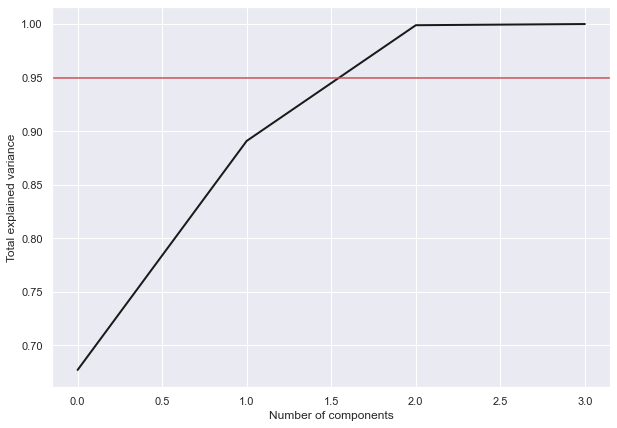

In [33]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.axhline(0.95, c='r')
plt.show();

In [34]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1','PC2','PC3','PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
bowler,,,,
Rashid Khan,-1.627656,-1.192413,0.202573,0.047262
Shadab Khan,-2.493550,-0.808137,0.950839,0.079652
Mohammad Hafeez,-0.830464,-1.198318,-0.853904,0.068877
Imran Tahir,-1.797102,-0.931965,0.717597,0.013717
Asif Afridi,-1.207031,-1.007684,-0.663576,0.096052


In [35]:
df_plot = df_plot.reset_index()

In [36]:
df_plot.sort_values(by = ['PC1','PC2','PC3','PC4'],ascending = True).head(15)

,bowler,PC1,PC2,PC3,PC4
1,Shadab Khan,-2.493550,-0.808137,0.950839,0.079652
5,Khushdil Shah,-2.022570,-0.774492,0.566642,0.059629
11,Shaheen Shah Afridi,-1.953840,-0.146897,1.382431,-0.031156
3,Imran Tahir,-1.797102,-0.931965,0.717597,0.013717
0,Rashid Khan,-1.627656,-1.192413,0.202573,0.047262
15,Zaman Khan,-1.626573,0.151190,1.095406,-0.034523
17,Salman Irshad,-1.494744,0.294719,0.501240,-0.007123
31,Shahnawaz Dhani,-1.383887,1.156534,0.875178,-0.071163
18,DJ Willey,-1.375139,0.305726,0.135383,0.009104
14,Naseem Shah,-1.254795,-0.016383,0.466998,-0.008103


In [37]:



df_plot.sort_values(by = ['PC1'],ascending = True).head(15)

df_plot[df_plot.select_dtypes(include=['number']).columns] *= -1

df_plot.sort_values(by = ['PC1'],ascending = False).head(15)


,bowler,PC1,PC2,PC3,PC4
1,Shadab Khan,2.493550,0.808137,-0.950839,-0.079652
5,Khushdil Shah,2.022570,0.774492,-0.566642,-0.059629
11,Shaheen Shah Afridi,1.953840,0.146897,-1.382431,0.031156
3,Imran Tahir,1.797102,0.931965,-0.717597,-0.013717
0,Rashid Khan,1.627656,1.192413,-0.202573,-0.047262
15,Zaman Khan,1.626573,-0.151190,-1.095406,0.034523
17,Salman Irshad,1.494744,-0.294719,-0.501240,0.007123
31,Shahnawaz Dhani,1.383887,-1.156534,-0.875178,0.071163
18,DJ Willey,1.375139,-0.305726,-0.135383,-0.009104
14,Naseem Shah,1.254795,0.016383,-0.466998,0.008103


In [38]:
df_plot

,bowler,PC1,PC2,PC3,PC4
0,Rashid Khan,1.627656,1.192413,-0.202573,-0.047262
1,Shadab Khan,2.493550,0.808137,-0.950839,-0.079652
2,Mohammad Hafeez,0.830464,1.198318,0.853904,-0.068877
3,Imran Tahir,1.797102,0.931965,-0.717597,-0.013717
4,Asif Afridi,1.207031,1.007684,0.663576,-0.096052
5,Khushdil Shah,2.022570,0.774492,-0.566642,-0.059629
6,Usman Shinwari,-0.683124,1.549725,0.803747,0.115092
7,Mohammad Nabi,-0.467618,1.408373,0.297909,0.132639
8,LA Dawson,1.149256,0.824732,0.440127,-0.065536
9,Imad Wasim,-0.240665,1.251079,0.233227,0.102312


In [40]:
bowler_team = all_data_2022.groupby(['bowler'])["bowling_team"].unique()\
.reset_index(name = 'bowling_team').sort_values( by = 'bowling_team',ascending = False)

bowler_team['team'] = [''.join(map(str, l)) for l in bowler_team['bowling_team']]
bowler_team.drop("bowling_team",axis=1,inplace = True)
bowler_team

df_plot = df_plot.merge(bowler_team,how="right")
df_plot = df_plot[df_plot['PC1'].notna()]

df_plot.sort_values('PC1',ascending=False)


df_plot.to_csv('bowlers_pca_2022.csv',index=False)

average_pca_team = pd.DataFrame()

average_pca_team = df_plot.groupby('team', as_index=False)['PC1'].mean()

average_pca_team

average_pca_team.to_csv('PCA_2022_Bowlers.csv', index=False)

In [31]:
d = {'col1': [1, 2,3,4,5], 'col2': [7.43, 8.42, 4.59, 8.99, 6.42]}
df65 = pd.DataFrame(data=d)
df65


,col1,col2
0,1,7.43
1,2,8.42
2,3,4.59
3,4,8.99
4,5,6.42


# PCA

In [46]:
bowler_all_stats_4

NameError: name 'bowler_all_stats_4' is not defined

## Scale X

In [34]:
X_std = pd.DataFrame(scale(df65), index=df65.index, columns=df65.columns)

In [35]:
X_std

,col1,col2
0,-1.414214,0.166712
1,-0.707107,0.801499
2,0.000000,-1.654295
3,0.707107,1.166983
4,1.414214,-0.480900


In [36]:
X_std["col1"].mean() , X_std["col1"].std() 

(0.0, 1.1180339887498947)

# Covariance Matrix

In [10]:
cov_mat = np.cov(X_std.T)
cov_mat

array([[ 1.25      , -0.16435625],
       [-0.16435625,  1.25      ]])

# Eigendecomposition on the covariance matrix

In [11]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]

Eigenvalues 
[1.08564375 1.41435625]


In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.4143562518904622
1.0856437481095376


# Projection Onto the New Feature Space

In [13]:
eig_pairs[0]

(1.4143562518904622, array([ 0.70710678, -0.70710678]))

In [14]:
eig_pairs[0][1]

array([ 0.70710678, -0.70710678])

In [16]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(2,1),
                      eig_pairs[1][1].reshape(2,1) ,
                     ))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]]


In [17]:
w_df = pd.DataFrame(matrix_w)

In [18]:
w_df

,0,1
0,0.707107,-0.707107
1,-0.707107,-0.707107


In [19]:
w_df.rename(columns = {0: 'PC1', 1: 'PC2',2: 'PC3', 3: 'PC4'}, inplace = True)

In [20]:
w_df

,PC1,PC2
0,0.707107,-0.707107
1,-0.707107,-0.707107


In [585]:
bowlers = ["wickets","average","strike_rate","econ"]

In [586]:
component_number = "PC1"

In [587]:
components_n = pd.DataFrame()
components_n["value"] =w_df[component_number]
components_n["bowlers"] = bowlers

In [588]:
def plot_component_number(component_number,color = "blue"):
    components_n = pd.DataFrame()
    components_n["value"] =w_df[component_number]
    components_n["bowlers"] = bowlers
    sns.barplot( y = 'value', x = 'bowlers', data = components_n, color=color)

    xlabel_name = "Component"
    ylabel_name = "Value"

    fig=plt.gcf()
    fig.set_size_inches(15,10)

    plt.tick_params(labelsize=14)
    plt.title(title_name,fontsize = 20)
    plt.xlabel(xlabel_name,fontsize = 20)
    plt.ylabel(ylabel_name,fontsize = 20)
    plt.xticks(rotation=90)

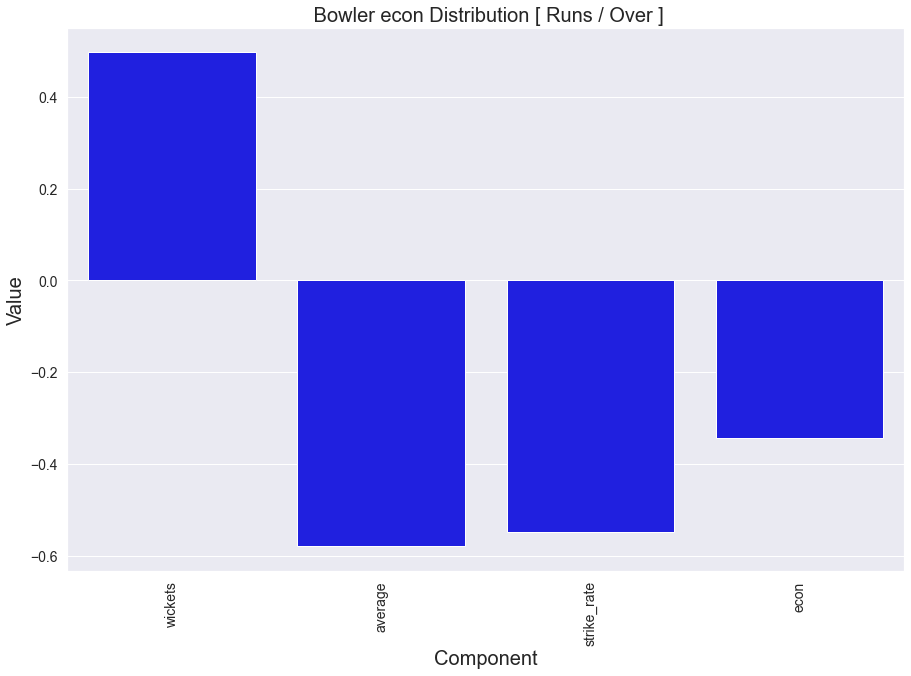

In [589]:
plot_component_number("PC1")

In [590]:
Y = X_std.dot(matrix_w)

In [591]:
Y

,0,1,2,3
bowler,,,,
Rashid Khan,1.941724,1.692280,0.145149,-0.084161
JP Faulkner,2.272530,0.523305,-0.059723,-0.119894
Hasan Ali,1.636020,0.772123,-0.457237,-0.019990
Faheem Ashraf,1.135583,0.854092,0.330627,-0.028286
Imran Tahir,2.170999,0.462184,-0.110305,-0.101570
Mohammad Irfan,0.818651,1.000484,-0.141733,0.037629
Noor Ahmad,0.015864,1.018702,1.023224,0.022618
Shaheen Shah Afridi,2.113452,0.382384,-0.947836,-0.033507
Imran Khan (2),1.854686,0.264771,0.004470,-0.067676


In [592]:
Y_1 = Y.reset_index()


In [593]:
Y_1

,bowler,0,1,2,3
0,Rashid Khan,1.941724,1.692280,0.145149,-0.084161
1,JP Faulkner,2.272530,0.523305,-0.059723,-0.119894
2,Hasan Ali,1.636020,0.772123,-0.457237,-0.019990
3,Faheem Ashraf,1.135583,0.854092,0.330627,-0.028286
4,Imran Tahir,2.170999,0.462184,-0.110305,-0.101570
5,Mohammad Irfan,0.818651,1.000484,-0.141733,0.037629
6,Noor Ahmad,0.015864,1.018702,1.023224,0.022618
7,Shaheen Shah Afridi,2.113452,0.382384,-0.947836,-0.033507
8,Imran Khan (2),1.854686,0.264771,0.004470,-0.067676
9,Khurram Shahzad (2),1.139798,0.363123,0.938445,-0.064832


In [594]:
Y_1.rename(columns = {0: 'PC1', 1: 'PC2'}, inplace = True)
Y_1.sort_values(by = 'PC1',ascending = True).head(15)

,bowler,PC1,PC2,2,3
24,Sohail Khan,-4.152434,1.397770,-0.887110,0.029889
38,Amad Butt,-4.019388,-1.363712,-0.465704,-0.367204
25,Mujeeb Ur Rahman,-2.981312,0.883143,-0.146011,0.017785
29,Shahid Afridi,-2.934932,0.395974,-0.058491,-0.055438
15,Mohammad Amir,-2.723038,1.441444,-0.881214,0.154549
30,Ahmed Daniyal,-1.712260,-0.100170,-0.376601,-0.024851
18,Sohail Tanvir,-1.310045,0.550367,0.045896,0.048633
36,DT Christian,-0.869385,-1.667803,0.853681,0.060438
37,Zahid Mahmood,-0.868254,-1.990176,0.351711,0.066785
14,CR Brathwaite,-0.851912,0.682895,0.565358,0.050767


In [595]:
df_plot.sort_values(by = 'PC1',ascending = True).head(15)

,bowler,PC1,PC2,PC3,PC4,team
66,Imad Wasim,-0.150896,0.450451,0.183865,0.037933,Karachi Kings
72,Shadab Khan,-0.126674,-0.202035,-0.263152,0.026377,Islamabad United
9,Mohammad Nawaz (3),-0.106664,0.642397,0.456824,0.036055,Quetta Gladiators
51,Haris Rauf,-0.047686,-1.077369,-0.378096,0.040608,Lahore Qalandars
7,Mohammad Hasnain,0.118828,-0.216930,-0.119547,0.027046,Quetta Gladiators
78,Faheem Ashraf,1.135583,0.854092,0.330627,-0.028286,Islamabad United
18,Wahab Riaz,1.702651,-0.840510,-1.572134,0.053893,Peshawar Zalmi
19,S Mahmood,1.881758,-0.435004,0.109462,-0.028117,Peshawar Zalmi
46,Shaheen Shah Afridi,2.113452,0.382384,-0.947836,-0.033507,Lahore Qalandars
42,Imran Tahir,2.170999,0.462184,-0.110305,-0.101570,Multan Sultans


Eigenvectors 
[[ 0.49687532 -0.10922632 -0.86082961  0.01252657]
 [-0.57915795  0.09909264 -0.35743015 -0.72594793]
 [-0.54734648  0.37151989 -0.35344688  0.66140767]
 [-0.34366089 -0.91663691 -0.07931821  0.18810259]]

Eigenvalues 
[2.86697376 0.81510075 0.4166879  0.00650075]
Eigenvalues in descending order:
2.8669737560843447
0.8151007522758446
0.416687895369794
0.006500754164755101
Matrix W:
 [[ 0.49687532 -0.10922632 -0.86082961  0.01252657]
 [-0.57915795  0.09909264 -0.35743015 -0.72594793]
 [-0.54734648  0.37151989 -0.35344688  0.66140767]
 [-0.34366089 -0.91663691 -0.07931821  0.18810259]]


,bowler,PC1,PC2,PC3,PC4,team
66,Imad Wasim,-0.150896,0.450451,0.183865,0.037933,Karachi Kings
72,Shadab Khan,-0.126674,-0.202035,-0.263152,0.026377,Islamabad United
9,Mohammad Nawaz (3),-0.106664,0.642397,0.456824,0.036055,Quetta Gladiators
51,Haris Rauf,-0.047686,-1.077369,-0.378096,0.040608,Lahore Qalandars
7,Mohammad Hasnain,0.118828,-0.216930,-0.119547,0.027046,Quetta Gladiators
78,Faheem Ashraf,1.135583,0.854092,0.330627,-0.028286,Islamabad United
18,Wahab Riaz,1.702651,-0.840510,-1.572134,0.053893,Peshawar Zalmi
19,S Mahmood,1.881758,-0.435004,0.109462,-0.028117,Peshawar Zalmi
46,Shaheen Shah Afridi,2.113452,0.382384,-0.947836,-0.033507,Lahore Qalandars
42,Imran Tahir,2.170999,0.462184,-0.110305,-0.101570,Multan Sultans


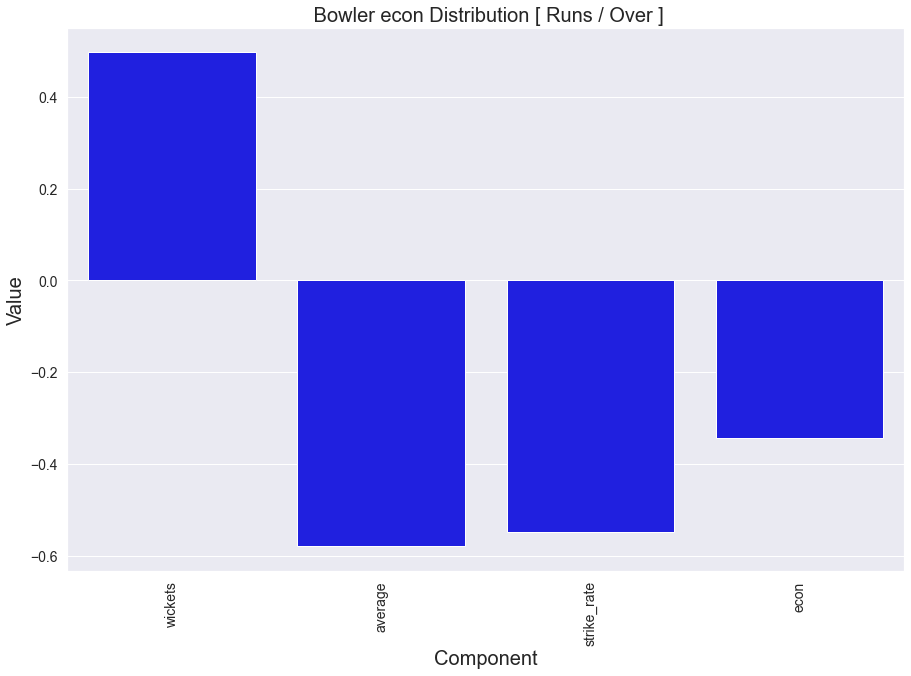

In [596]:
bowler_all_stats_4

## Scale X

X_std = pd.DataFrame(scale(bowler_all_stats_4), index=bowler_all_stats_4.index, columns=bowler_all_stats_4.columns)

X_std

X_std["wickets"].mean() , X_std["wickets"].std() 

# Covariance Matrix

cov_mat = np.cov(X_std.T)
cov_mat

# Eigendecomposition on the covariance matrix

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

# Projection Onto the New Feature Space

eig_pairs[0]

eig_pairs[0][1]

matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1) ,
                      eig_pairs[2][1].reshape(4,1) ,
                      eig_pairs[3][1].reshape(4,1) 
                     
                     ))

print('Matrix W:\n', matrix_w)

w_df = pd.DataFrame(matrix_w)

w_df

w_df.rename(columns = {0: 'PC1', 1: 'PC2',2: 'PC3', 3: 'PC4'}, inplace = True)

w_df

bowlers = ["wickets","average","strike_rate","econ"]

component_number = "PC1"

components_n = pd.DataFrame()
components_n["value"] =w_df[component_number]
components_n["bowlers"] = bowlers

def plot_component_number(component_number,color = "blue"):
    components_n = pd.DataFrame()
    components_n["value"] =w_df[component_number]
    components_n["bowlers"] = bowlers
    sns.barplot( y = 'value', x = 'bowlers', data = components_n, color=color)

    xlabel_name = "Component"
    ylabel_name = "Value"

    fig=plt.gcf()
    fig.set_size_inches(15,10)

    plt.tick_params(labelsize=14)
    plt.title(title_name,fontsize = 20)
    plt.xlabel(xlabel_name,fontsize = 20)
    plt.ylabel(ylabel_name,fontsize = 20)
    plt.xticks(rotation=90)

plot_component_number("PC1")

Y = X_std.dot(matrix_w)

Y

Y_1 = Y.reset_index()


Y_1

Y_1.rename(columns = {0: 'PC1', 1: 'PC2'}, inplace = True)
Y_1.sort_values(by = 'PC1',ascending = True).head(15)

df_plot.sort_values(by = 'PC1',ascending = True).head(15)

# PCA 2021

In [41]:
all_data_2021.wicket_type.unique()

array(['0', 'caught', 'run out', 'bowled', 'lbw', 'caught and bowled',
       'stumped', 'hit wicket'], dtype=object)

In [42]:
runs_bowler = all_data_2021.groupby(["bowler"])["runs_conceded_bowler"].sum()
runs_bowler = runs_bowler.reset_index()
runs_bowler

,bowler,runs_conceded_bowler
0,Aamer Yamin,79.0
1,Abbas Afridi,102.0
2,Abdul Nasir,15.0
3,Abrar Ahmed,62.0
4,Ahmed Daniyal,330.0
...,...,...
73,Waqas Maqsood,192.0
74,Zafar Gohar,100.0
75,Zahid Mahmood,217.0
76,Zahir Khan,56.0


In [43]:
deliveries_bowler = all_data_2021.groupby(["bowler"])["bowler"].count()
deliveries_bowler = deliveries_bowler.reset_index(name = "deliveries")
deliveries_bowler

,bowler,deliveries
0,Aamer Yamin,34
1,Abbas Afridi,68
2,Abdul Nasir,24
3,Abrar Ahmed,42
4,Ahmed Daniyal,223
...,...,...
73,Waqas Maqsood,128
74,Zafar Gohar,46
75,Zahid Mahmood,123
76,Zahir Khan,50


In [44]:
all_data_2021.loc[all_data_2021['wicket_type'].str.contains('run out'), 'player_dismissed'] = '0'
                  
all_data_2021.loc[all_data_2021['wicket_type'].str.contains('run out'), 'wicket_type'] = '0'


wickets_bowler = all_data_2021[all_data_2021["player_dismissed"] != '0']  



In [45]:
wickets_bowler = wickets_bowler.groupby(["bowler"])["bowler"].count()
wickets_bowler = wickets_bowler.reset_index(name = "wickets")
wickets_bowler


,bowler,wickets
0,Aamer Yamin,2
1,Abbas Afridi,4
2,Abdul Nasir,1
3,Abrar Ahmed,3
4,Ahmed Daniyal,6
...,...,...
60,Usman Shinwari,5
61,Wahab Riaz,18
62,Waqas Maqsood,7
63,Zahid Mahmood,6


In [46]:
bowler_stats = runs_bowler.merge(deliveries_bowler, how = "left")

In [47]:
bowler_stats = bowler_stats.merge(wickets_bowler, how="left")



In [48]:
bowler_stats.sort_values('wickets',ascending=False)

,bowler,runs_conceded_bowler,deliveries,wickets
63,Shahnawaz Dhani,340.0,250,20.0
71,Wahab Riaz,422.0,301,18.0
61,Shaheen Shah Afridi,292.0,258,16.0
24,Hasan Ali,269.0,248,13.0
32,JP Faulkner,156.0,145,13.0
...,...,...,...,...
54,R Powell,8.0,6,NaN
65,Sohaibullah,26.0,19,NaN
72,Waqar Salamkheil,38.0,18,NaN
74,Zafar Gohar,100.0,46,NaN


In [49]:
bowler_stats = bowler_stats[bowler_stats["deliveries"] > bowler_stats["deliveries"].median()]

In [50]:
bowler_stats["average"] = round(bowler_stats["runs_conceded_bowler"] / bowler_stats["wickets"],2)

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

def draw_plot(fig_size_x = 15,
              fig_size_y = 10,
              tick_params_labelsize = 14,
             xlabel_name_fontsize = 20,
             ylabel_name_fontsize = 20,
             title_name_fontsize = 20,
             xlabel_name = "",
             ylabel_name = "",
             title_name = ""):
    
    #get current figure 
    fig=plt.gcf()
    
    #set the size of the figure
    fig.set_size_inches(fig_size_x,fig_size_y)

    #get axes of the current figure 
    ax =  fig.gca()

    # set the label size of the ticks of the axes
    ax.tick_params(labelsize=tick_params_labelsize)

    # set the label size of the x axis
    ax.set_xlabel(xlabel_name,fontsize = xlabel_name_fontsize)

    # set the label size of the y axis
    ax.set_ylabel(ylabel_name,fontsize = ylabel_name_fontsize)

     # set the title of the plot
    ax.set_title(title_name,fontsize = title_name_fontsize)

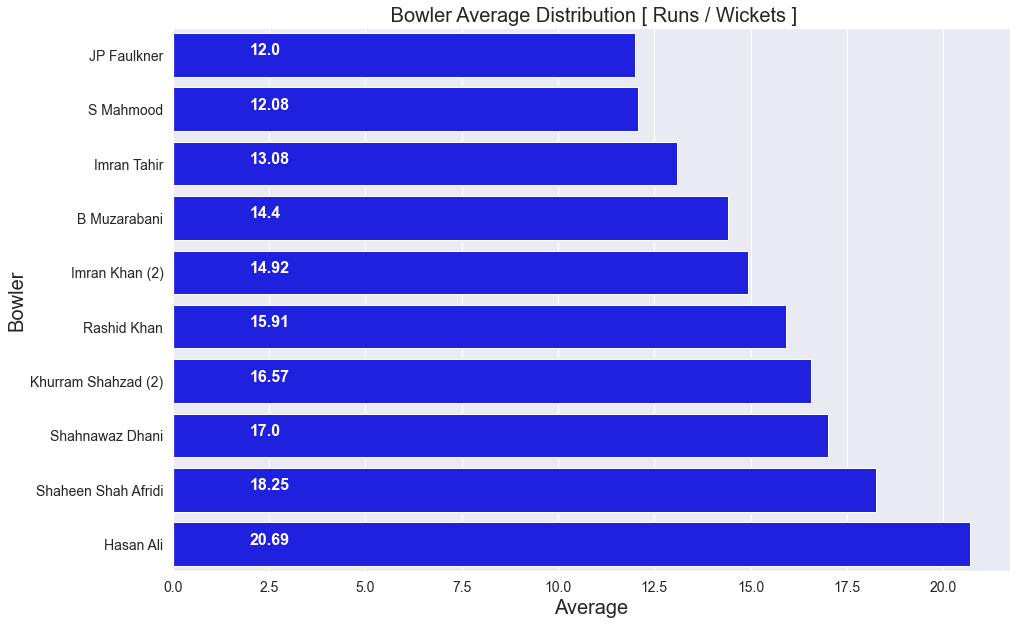

In [52]:
bowler_stats = bowler_stats.sort_values(by = "average",ascending = True)
xlabel_name = "Average"
ylabel_name = "Bowler"
title_name = " Bowler Average Distribution [ Runs / Wickets ]"

sns.barplot( x = "average" , y = "bowler" , data = bowler_stats.head(10), color = "blue")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(bowler_stats.head(10)["average"].values):
    ax.text(2, i, v,fontsize=16,color='white',weight='bold')

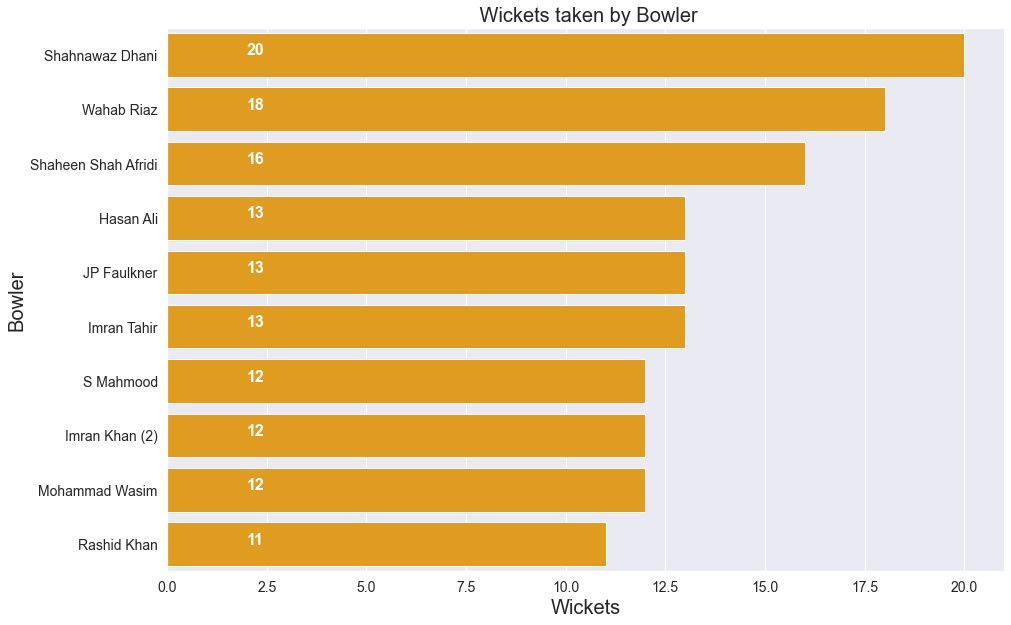

In [53]:
wickets_bowler = wickets_bowler.sort_values(by = "wickets",ascending = False)
xlabel_name = "Wickets"
ylabel_name = "Bowler"
title_name = " Wickets taken by Bowler"

sns.barplot( x = "wickets" , y = "bowler" , data = wickets_bowler.head(10), color = "orange")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(wickets_bowler.head(10)["wickets"].values):
    ax.text(2, i, v,fontsize=16,color='white',weight='bold')

In [54]:
bowler_stats["strike_rate"] = round(bowler_stats["deliveries"] / bowler_stats["wickets"],2)

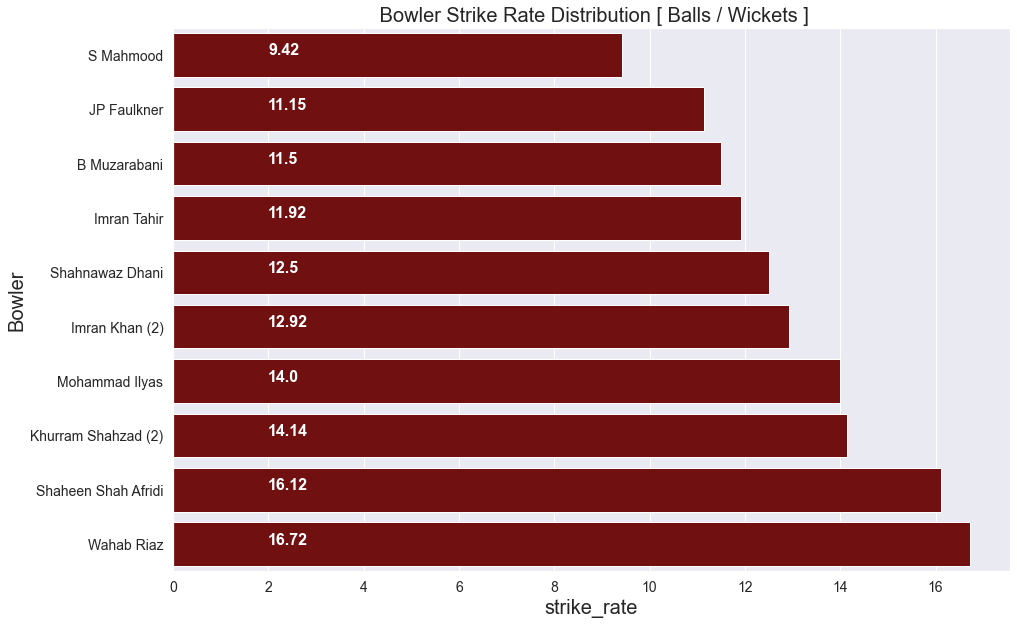

In [55]:
bowler_stats = bowler_stats.sort_values(by = "strike_rate",ascending = True)
xlabel_name = "strike_rate"
ylabel_name = "Bowler"
title_name = " Bowler Strike Rate Distribution [ Balls / Wickets ]"

sns.barplot( x = "strike_rate" , y = "bowler" , data = bowler_stats.head(10), color = "maroon")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(bowler_stats.head(10)["strike_rate"].values):
    ax.text(2, i, v,fontsize=16,color='white',weight='bold')

In [56]:
bowler_stats["econ"] = round((bowler_stats["runs_conceded_bowler"] / bowler_stats["deliveries"])*6,2)

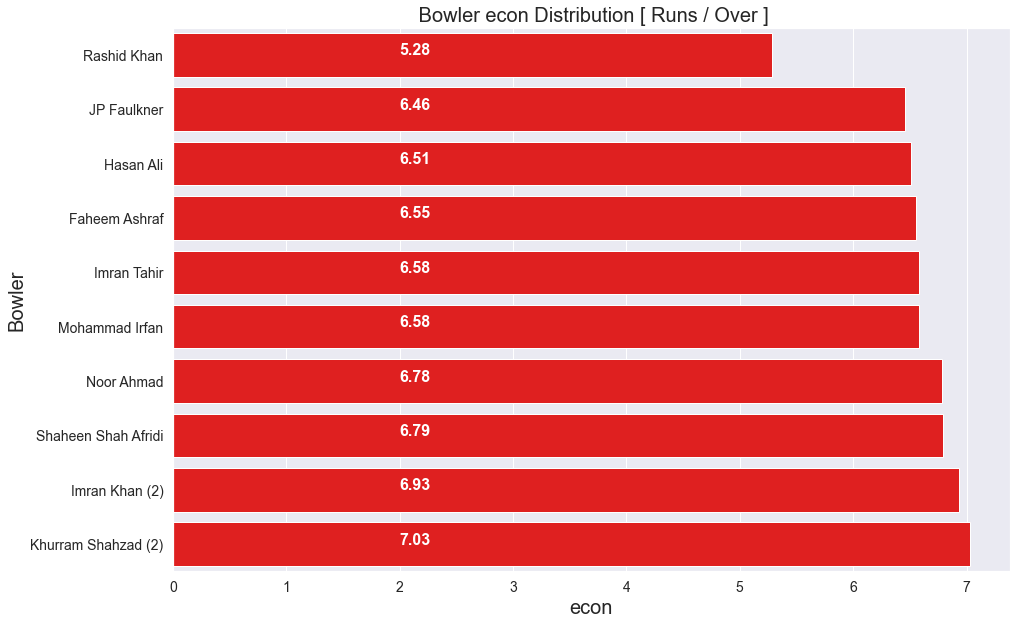

In [57]:
bowler_stats = bowler_stats.sort_values(by = "econ",ascending = True)
xlabel_name = "econ"
ylabel_name = "Bowler"
title_name = " Bowler econ Distribution [ Runs / Over ]"

sns.barplot( x = "econ" , y = "bowler" , data = bowler_stats.head(10), color = "red")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(bowler_stats.head(10)["econ"].values):
    ax.text(2, i, v,fontsize=16,color='white',weight='bold')

In [58]:
bowler_stats["deliveries"].median()

155.0

In [59]:
bowler_stats.sort_values(by="deliveries",ascending = False)

,bowler,runs_conceded_bowler,deliveries,wickets,average,strike_rate,econ
71,Wahab Riaz,422.0,301,18.0,23.44,16.72,8.41
37,Mohammad Amir,349.0,273,5.0,69.80,54.60,7.67
61,Shaheen Shah Afridi,292.0,258,16.0,18.25,16.12,6.79
41,Mohammad Imran (2),340.0,253,9.0,37.78,28.11,8.06
63,Shahnawaz Dhani,340.0,250,20.0,17.00,12.50,8.16
24,Hasan Ali,269.0,248,13.0,20.69,19.08,6.51
42,Mohammad Irfan,271.0,247,10.0,27.10,24.70,6.58
46,Mohammad Wasim,336.0,246,12.0,28.00,20.50,8.20
60,Shadab Khan,325.0,234,9.0,36.11,26.00,8.33
4,Ahmed Daniyal,330.0,223,6.0,55.00,37.17,8.88


In [60]:
bowler_stats.columns

Index(['bowler', 'runs_conceded_bowler', 'deliveries', 'wickets', 'average',
       'strike_rate', 'econ'],
      dtype='object')

In [61]:
bowler_stats = bowler_stats[bowler_stats["deliveries"] > 50]

In [62]:
bowler_all_stats_4 = bowler_stats[['wickets', 'average','strike_rate', 'econ']]

In [63]:
bowler_all_stats_4 = bowler_all_stats_4.fillna(0)
bowler_all_stats_4.index =bowler_stats.bowler

In [37]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(df65), index=df65.index, columns=df65.columns)

In [38]:
X

,col1,col2
0,-1.414214,0.166712
1,-0.707107,0.801499
2,0.000000,-1.654295
3,0.707107,1.166983
4,1.414214,-0.480900


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [40]:
from sklearn.decomposition import PCA

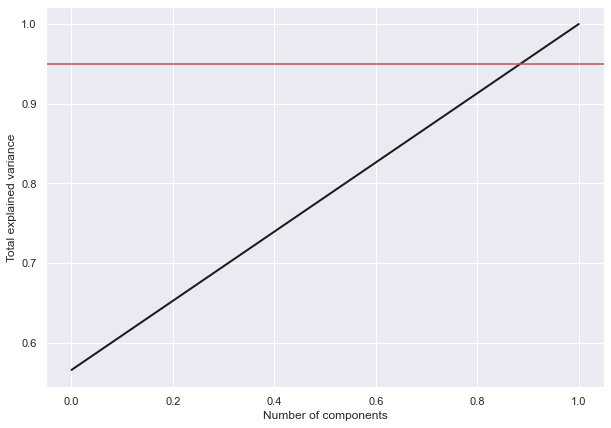

In [41]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.axhline(0.95, c='r')
plt.show();

In [42]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1','PC2'], index=X.index)
df_plot.head()

,PC1,PC2
0,-1.117883,-0.882117
1,-1.066746,0.066746
2,1.169763,-1.169763
3,-0.325182,1.325182
4,1.340047,0.659953


In [43]:
df_plot = df_plot.reset_index()

In [45]:
df_plot.sort_values(by = ['PC1','PC2'],ascending = True).head(15)

,index,PC1,PC2
0,0,-1.117883,-0.882117
1,1,-1.066746,0.066746
3,3,-0.325182,1.325182
2,2,1.169763,-1.169763
4,4,1.340047,0.659953


In [72]:



df_plot.sort_values(by = ['PC1'],ascending = True).head(15)

df_plot[df_plot.select_dtypes(include=['number']).columns] *= -1

df_plot.sort_values(by = ['PC1'],ascending = False).head(15)


,bowler,PC1,PC2,PC3,PC4
20,Shahnawaz Dhani,2.392837,-0.865746,-1.714342,0.042342
1,JP Faulkner,2.272530,0.523305,-0.059723,-0.119894
4,Imran Tahir,2.170999,0.462184,-0.110305,-0.101570
7,Shaheen Shah Afridi,2.113452,0.382384,-0.947836,-0.033507
0,Rashid Khan,1.941724,1.692280,0.145149,-0.084161
16,S Mahmood,1.881758,-0.435004,0.109462,-0.028117
8,Imran Khan (2),1.854686,0.264771,0.004470,-0.067676
27,Wahab Riaz,1.702651,-0.840510,-1.572134,0.053893
2,Hasan Ali,1.636020,0.772123,-0.457237,-0.019990
12,B Muzarabani,1.538254,-0.165778,0.420467,-0.040668


In [73]:
df_plot

,bowler,PC1,PC2,PC3,PC4
0,Rashid Khan,1.941724,1.692280,0.145149,-0.084161
1,JP Faulkner,2.272530,0.523305,-0.059723,-0.119894
2,Hasan Ali,1.636020,0.772123,-0.457237,-0.019990
3,Faheem Ashraf,1.135583,0.854092,0.330627,-0.028286
4,Imran Tahir,2.170999,0.462184,-0.110305,-0.101570
5,Mohammad Irfan,0.818651,1.000484,-0.141733,0.037629
6,Noor Ahmad,0.015864,1.018702,1.023224,0.022618
7,Shaheen Shah Afridi,2.113452,0.382384,-0.947836,-0.033507
8,Imran Khan (2),1.854686,0.264771,0.004470,-0.067676
9,Khurram Shahzad (2),1.139798,0.363123,0.938445,-0.064832


In [74]:
bowler_team = all_data_2021.groupby(['bowler'])["bowling_team"].unique()\
.reset_index(name = 'bowling_team').sort_values( by = 'bowling_team',ascending = False)

bowler_team['team'] = [''.join(map(str, l)) for l in bowler_team['bowling_team']]
bowler_team.drop("bowling_team",axis=1,inplace = True)
bowler_team

df_plot = df_plot.merge(bowler_team,how="right")
df_plot = df_plot[df_plot['PC1'].notna()]

df_plot.sort_values('PC1',ascending=False)

df_plot.to_csv('bowlers_pca_2021.csv',index=False)

average_pca_team = pd.DataFrame()

average_pca_team = df_plot.groupby('team', as_index=False)['PC1'].mean()

average_pca_team.to_csv('PCA_2021_Bowlers.csv', index=False)

# PCA

In [631]:
bowler_all_stats_4

,wickets,average,strike_rate,econ
bowler,,,,
Rashid Khan,11.0,15.91,18.09,5.28
JP Faulkner,13.0,12.00,11.15,6.46
Hasan Ali,13.0,20.69,19.08,6.51
Faheem Ashraf,9.0,21.11,19.33,6.55
Imran Tahir,13.0,13.08,11.92,6.58
Mohammad Irfan,10.0,27.10,24.70,6.58
Noor Ahmad,4.0,28.25,25.00,6.78
Shaheen Shah Afridi,16.0,18.25,16.12,6.79
Imran Khan (2),12.0,14.92,12.92,6.93


## Scale X

In [632]:
X_std = pd.DataFrame(scale(bowler_all_stats_4), index=bowler_all_stats_4.index, columns=bowler_all_stats_4.columns)

In [633]:
X_std

,wickets,average,strike_rate,econ
bowler,,,,
Rashid Khan,0.653950,-0.947657,-0.541047,-2.245845
JP Faulkner,1.121915,-1.155915,-1.107633,-1.278475
Hasan Ali,1.121915,-0.693060,-0.460223,-1.237485
Faheem Ashraf,0.185986,-0.670690,-0.439813,-1.204693
Imran Tahir,1.121915,-1.098391,-1.044770,-1.180099
Mohammad Irfan,0.419968,-0.351645,-0.001403,-1.180099
Noor Ahmad,-0.983925,-0.290392,0.023090,-1.016138
Shaheen Shah Afridi,1.823861,-0.823022,-0.701879,-1.007940
Imran Khan (2),0.887933,-1.000387,-0.963129,-0.893167


In [634]:
X_std["wickets"].mean() , X_std["wickets"].std() 

(9.678867394168032e-17, 1.0130724502589554)

# Covariance Matrix

In [635]:
cov_mat = np.cov(X_std.T)
cov_mat

array([[ 1.02631579, -0.70569917, -0.68595296, -0.37947959],
       [-0.70569917,  1.02631579,  0.98835865,  0.50751357],
       [-0.68595296,  0.98835865,  1.02631579,  0.27419119],
       [-0.37947959,  0.50751357,  0.27419119,  1.02631579]])

# Eigendecomposition on the covariance matrix

In [636]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.49687532 -0.10922632 -0.86082961  0.01252657]
 [-0.57915795  0.09909264 -0.35743015 -0.72594793]
 [-0.54734648  0.37151989 -0.35344688  0.66140767]
 [-0.34366089 -0.91663691 -0.07931821  0.18810259]]

Eigenvalues 
[2.86697376 0.81510075 0.4166879  0.00650075]


In [637]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.8669737560843447
0.8151007522758446
0.416687895369794
0.006500754164755101


# Projection Onto the New Feature Space

In [638]:
eig_pairs[0]

(2.8669737560843447,
 array([ 0.49687532, -0.57915795, -0.54734648, -0.34366089]))

In [639]:
eig_pairs[0][1]

array([ 0.49687532, -0.57915795, -0.54734648, -0.34366089])

In [640]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1) ,
                      eig_pairs[2][1].reshape(4,1) ,
                      eig_pairs[3][1].reshape(4,1) 
                     
                     ))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.49687532 -0.10922632 -0.86082961  0.01252657]
 [-0.57915795  0.09909264 -0.35743015 -0.72594793]
 [-0.54734648  0.37151989 -0.35344688  0.66140767]
 [-0.34366089 -0.91663691 -0.07931821  0.18810259]]


In [641]:
w_df = pd.DataFrame(matrix_w)

In [642]:
w_df

,0,1,2,3
0,0.496875,-0.109226,-0.860830,0.012527
1,-0.579158,0.099093,-0.357430,-0.725948
2,-0.547346,0.371520,-0.353447,0.661408
3,-0.343661,-0.916637,-0.079318,0.188103


In [643]:
w_df.rename(columns = {0: 'PC1', 1: 'PC2',2: 'PC3', 3: 'PC4'}, inplace = True)

In [644]:
w_df

,PC1,PC2,PC3,PC4
0,0.496875,-0.109226,-0.860830,0.012527
1,-0.579158,0.099093,-0.357430,-0.725948
2,-0.547346,0.371520,-0.353447,0.661408
3,-0.343661,-0.916637,-0.079318,0.188103


In [645]:
bowlers = ["wickets","average","strike_rate","econ"]

In [646]:
component_number = "PC1"

In [647]:
components_n = pd.DataFrame()
components_n["value"] =w_df[component_number]
components_n["bowlers"] = bowlers

In [648]:
def plot_component_number(component_number,color = "blue"):
    components_n = pd.DataFrame()
    components_n["value"] =w_df[component_number]
    components_n["bowlers"] = bowlers
    sns.barplot( y = 'value', x = 'bowlers', data = components_n, color=color)

    xlabel_name = "Component"
    ylabel_name = "Value"

    fig=plt.gcf()
    fig.set_size_inches(15,10)

    plt.tick_params(labelsize=14)
    plt.title(title_name,fontsize = 20)
    plt.xlabel(xlabel_name,fontsize = 20)
    plt.ylabel(ylabel_name,fontsize = 20)
    plt.xticks(rotation=90)

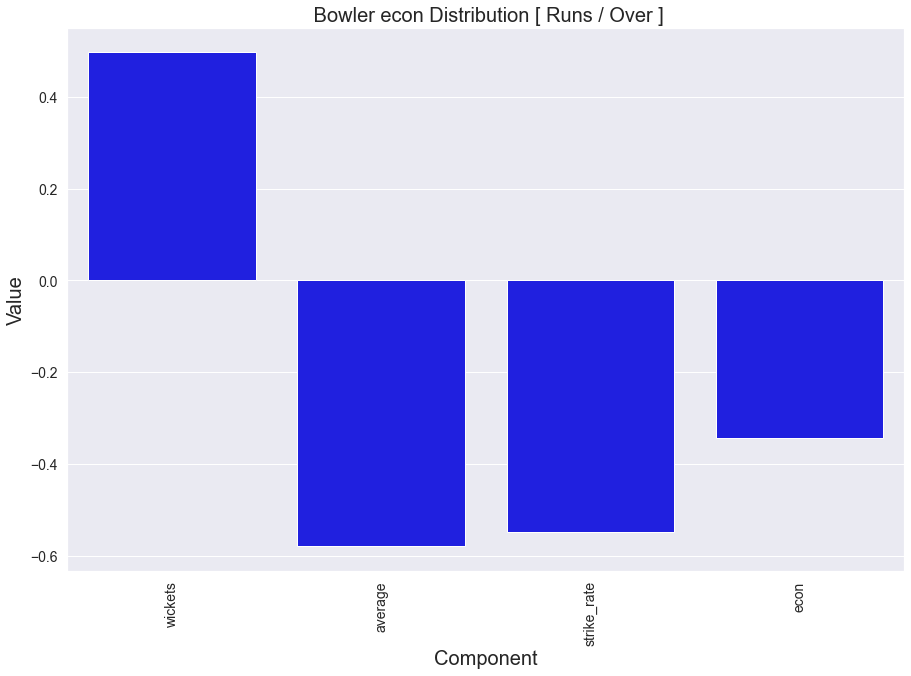

In [649]:
plot_component_number("PC1")

In [650]:
Y = X_std.dot(matrix_w)

In [651]:
Y

,0,1,2,3
bowler,,,,
Rashid Khan,1.941724,1.692280,0.145149,-0.084161
JP Faulkner,2.272530,0.523305,-0.059723,-0.119894
Hasan Ali,1.636020,0.772123,-0.457237,-0.019990
Faheem Ashraf,1.135583,0.854092,0.330627,-0.028286
Imran Tahir,2.170999,0.462184,-0.110305,-0.101570
Mohammad Irfan,0.818651,1.000484,-0.141733,0.037629
Noor Ahmad,0.015864,1.018702,1.023224,0.022618
Shaheen Shah Afridi,2.113452,0.382384,-0.947836,-0.033507
Imran Khan (2),1.854686,0.264771,0.004470,-0.067676


In [652]:
Y_1 = Y.reset_index()


In [653]:
Y_1

,bowler,0,1,2,3
0,Rashid Khan,1.941724,1.692280,0.145149,-0.084161
1,JP Faulkner,2.272530,0.523305,-0.059723,-0.119894
2,Hasan Ali,1.636020,0.772123,-0.457237,-0.019990
3,Faheem Ashraf,1.135583,0.854092,0.330627,-0.028286
4,Imran Tahir,2.170999,0.462184,-0.110305,-0.101570
5,Mohammad Irfan,0.818651,1.000484,-0.141733,0.037629
6,Noor Ahmad,0.015864,1.018702,1.023224,0.022618
7,Shaheen Shah Afridi,2.113452,0.382384,-0.947836,-0.033507
8,Imran Khan (2),1.854686,0.264771,0.004470,-0.067676
9,Khurram Shahzad (2),1.139798,0.363123,0.938445,-0.064832


In [654]:
Y_1.rename(columns = {0: 'PC1', 1: 'PC2'}, inplace = True)
Y_1.sort_values(by = 'PC1',ascending = True).head(15)

,bowler,PC1,PC2,2,3
24,Sohail Khan,-4.152434,1.397770,-0.887110,0.029889
38,Amad Butt,-4.019388,-1.363712,-0.465704,-0.367204
25,Mujeeb Ur Rahman,-2.981312,0.883143,-0.146011,0.017785
29,Shahid Afridi,-2.934932,0.395974,-0.058491,-0.055438
15,Mohammad Amir,-2.723038,1.441444,-0.881214,0.154549
30,Ahmed Daniyal,-1.712260,-0.100170,-0.376601,-0.024851
18,Sohail Tanvir,-1.310045,0.550367,0.045896,0.048633
36,DT Christian,-0.869385,-1.667803,0.853681,0.060438
37,Zahid Mahmood,-0.868254,-1.990176,0.351711,0.066785
14,CR Brathwaite,-0.851912,0.682895,0.565358,0.050767


In [655]:
df_plot.sort_values(by = 'PC1',ascending = True).head(15)

,bowler,PC1,PC2,PC3,PC4,team
34,Sohail Khan,-4.152434,1.397770,-0.887110,0.029889,Multan Sultans
19,Amad Butt,-4.019388,-1.363712,-0.465704,-0.367204,Peshawar Zalmi
21,Mujeeb Ur Rahman,-2.981312,0.883143,-0.146011,0.017785,Peshawar Zalmi
32,Shahid Afridi,-2.934932,0.395974,-0.058491,-0.055438,Multan Sultans
61,Mohammad Amir,-2.723038,1.441444,-0.881214,0.154549,Karachi Kings
45,Ahmed Daniyal,-1.712260,-0.100170,-0.376601,-0.024851,Lahore Qalandars
35,Sohail Tanvir,-1.310045,0.550367,0.045896,0.048633,Multan Sultans
57,DT Christian,-0.869385,-1.667803,0.853681,0.060438,Karachi Kings
3,Zahid Mahmood,-0.868254,-1.990176,0.351711,0.066785,Quetta Gladiators
37,CR Brathwaite,-0.851912,0.682895,0.565358,0.050767,Multan Sultans


Eigenvectors 
[[ 0.49687532 -0.10922632 -0.86082961  0.01252657]
 [-0.57915795  0.09909264 -0.35743015 -0.72594793]
 [-0.54734648  0.37151989 -0.35344688  0.66140767]
 [-0.34366089 -0.91663691 -0.07931821  0.18810259]]

Eigenvalues 
[2.86697376 0.81510075 0.4166879  0.00650075]
Eigenvalues in descending order:
2.8669737560843447
0.8151007522758446
0.416687895369794
0.006500754164755101
Matrix W:
 [[ 0.49687532 -0.10922632 -0.86082961  0.01252657]
 [-0.57915795  0.09909264 -0.35743015 -0.72594793]
 [-0.54734648  0.37151989 -0.35344688  0.66140767]
 [-0.34366089 -0.91663691 -0.07931821  0.18810259]]


,bowler,PC1,PC2,PC3,PC4,team
34,Sohail Khan,-4.152434,1.397770,-0.887110,0.029889,Multan Sultans
19,Amad Butt,-4.019388,-1.363712,-0.465704,-0.367204,Peshawar Zalmi
21,Mujeeb Ur Rahman,-2.981312,0.883143,-0.146011,0.017785,Peshawar Zalmi
32,Shahid Afridi,-2.934932,0.395974,-0.058491,-0.055438,Multan Sultans
61,Mohammad Amir,-2.723038,1.441444,-0.881214,0.154549,Karachi Kings
45,Ahmed Daniyal,-1.712260,-0.100170,-0.376601,-0.024851,Lahore Qalandars
35,Sohail Tanvir,-1.310045,0.550367,0.045896,0.048633,Multan Sultans
57,DT Christian,-0.869385,-1.667803,0.853681,0.060438,Karachi Kings
3,Zahid Mahmood,-0.868254,-1.990176,0.351711,0.066785,Quetta Gladiators
37,CR Brathwaite,-0.851912,0.682895,0.565358,0.050767,Multan Sultans


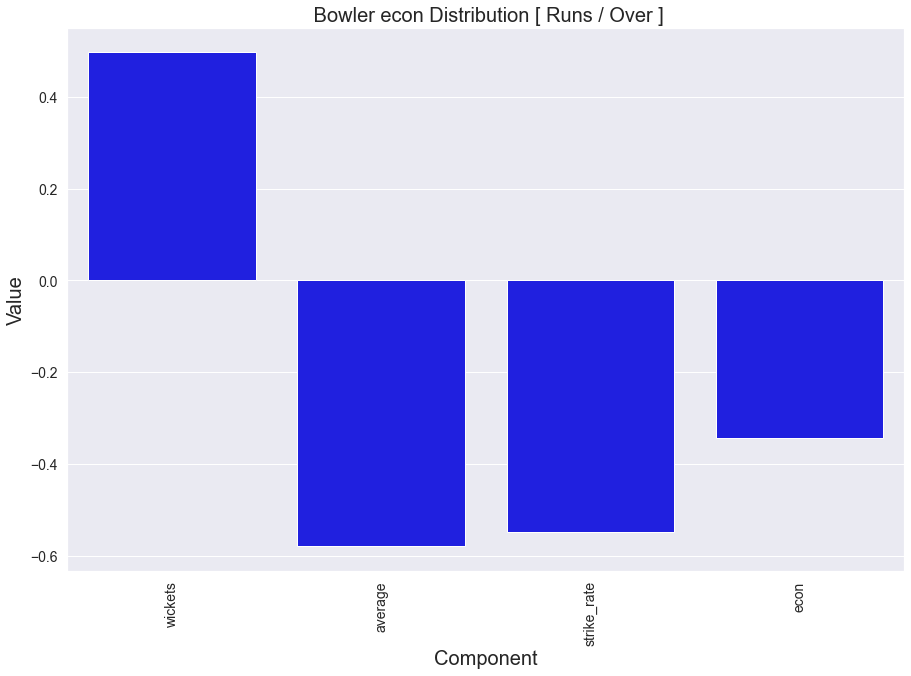

In [656]:
bowler_all_stats_4

## Scale X

X_std = pd.DataFrame(scale(bowler_all_stats_4), index=bowler_all_stats_4.index, columns=bowler_all_stats_4.columns)

X_std

X_std["wickets"].mean() , X_std["wickets"].std() 

# Covariance Matrix

cov_mat = np.cov(X_std.T)
cov_mat

# Eigendecomposition on the covariance matrix

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

# Projection Onto the New Feature Space

eig_pairs[0]

eig_pairs[0][1]

matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1) ,
                      eig_pairs[2][1].reshape(4,1) ,
                      eig_pairs[3][1].reshape(4,1) 
                     
                     ))

print('Matrix W:\n', matrix_w)

w_df = pd.DataFrame(matrix_w)

w_df

w_df.rename(columns = {0: 'PC1', 1: 'PC2',2: 'PC3', 3: 'PC4'}, inplace = True)

w_df

bowlers = ["wickets","average","strike_rate","econ"]

component_number = "PC1"

components_n = pd.DataFrame()
components_n["value"] =w_df[component_number]
components_n["bowlers"] = bowlers

def plot_component_number(component_number,color = "blue"):
    components_n = pd.DataFrame()
    components_n["value"] =w_df[component_number]
    components_n["bowlers"] = bowlers
    sns.barplot( y = 'value', x = 'bowlers', data = components_n, color=color)

    xlabel_name = "Component"
    ylabel_name = "Value"

    fig=plt.gcf()
    fig.set_size_inches(15,10)

    plt.tick_params(labelsize=14)
    plt.title(title_name,fontsize = 20)
    plt.xlabel(xlabel_name,fontsize = 20)
    plt.ylabel(ylabel_name,fontsize = 20)
    plt.xticks(rotation=90)

plot_component_number("PC1")

Y = X_std.dot(matrix_w)

Y

Y_1 = Y.reset_index()


Y_1

Y_1.rename(columns = {0: 'PC1', 1: 'PC2'}, inplace = True)
Y_1.sort_values(by = 'PC1',ascending = True).head(15)

df_plot.sort_values(by = 'PC1',ascending = True).head(15)

# PCA 2020

In [5]:
all_data_2020.wicket_type.unique()

array(['caught and bowled', '0', 'caught', 'bowled', 'lbw', 'run out',
       'stumped'], dtype=object)

In [6]:
runs_bowler = all_data_2020.groupby(["bowler"])["runs_conceded_bowler"].sum()
runs_bowler = runs_bowler.reset_index()
runs_bowler

,bowler,runs_conceded_bowler
0,A Lyth,26.0
1,Aamer Yamin,48.0
2,Abdul Nasir,26.0
3,Ahmed Safi Abdullah,65.0
4,Akif Javed,125.0
...,...,...
70,Wahab Riaz,292.0
71,Waqas Maqsood,63.0
72,Yasir Shah,112.0
73,Zafar Gohar,62.0


In [8]:
deliveries_bowler = all_data_2020.groupby(["bowler"])["bowler"].count()
deliveries_bowler = deliveries_bowler.reset_index(name = "deliveries")
deliveries_bowler

,bowler,deliveries
0,A Lyth,19
1,Aamer Yamin,50
2,Abdul Nasir,18
3,Ahmed Safi Abdullah,48
4,Akif Javed,94
...,...,...
70,Wahab Riaz,226
71,Waqas Maqsood,74
72,Yasir Shah,73
73,Zafar Gohar,60


In [9]:
all_data_2020.loc[all_data_2020['wicket_type'].str.contains('run out'), 'player_dismissed'] = '0'
                  
all_data_2020.loc[all_data_2020['wicket_type'].str.contains('run out'), 'wicket_type'] = '0'


wickets_bowler = all_data_2020[all_data_2020["player_dismissed"] != '0']  

all_data_2020.wicket_type.unique()

array(['caught and bowled', '0', 'caught', 'bowled', 'lbw', 'stumped'],
      dtype=object)

In [10]:
wickets_bowler = wickets_bowler.groupby(["bowler"])["bowler"].count()
wickets_bowler = wickets_bowler.reset_index(name = "wickets")
wickets_bowler


,bowler,wickets
0,A Lyth,1
1,Aamer Yamin,3
2,Ahmed Safi Abdullah,4
3,Akif Javed,4
4,Ali Khan,1
5,Ali Shafiq,2
6,Amad Butt,5
7,Arshad Iqbal,9
8,BCJ Cutting,8
9,Bilawal Bhatti,3


In [11]:
bowler_stats = runs_bowler.merge(deliveries_bowler, how = "left")

In [12]:
bowler_stats = bowler_stats.merge(wickets_bowler, how="left")



In [13]:
bowler_stats.sort_values('wickets',ascending=False)

bowler_stats.dropna()

,bowler,runs_conceded_bowler,deliveries,wickets
0,A Lyth,26.0,19,1.0
1,Aamer Yamin,48.0,50,3.0
3,Ahmed Safi Abdullah,65.0,48,4.0
4,Akif Javed,125.0,94,4.0
5,Ali Khan,36.0,20,1.0
6,Ali Shafiq,71.0,44,2.0
7,Amad Butt,143.0,89,5.0
9,Arshad Iqbal,206.0,149,9.0
10,BCJ Cutting,173.0,99,8.0
11,Bilawal Bhatti,67.0,44,3.0


In [14]:
bowler_stats = bowler_stats[bowler_stats["deliveries"] > bowler_stats["deliveries"].median()]

In [15]:
bowler_stats["average"] = round(bowler_stats["runs_conceded_bowler"] / bowler_stats["wickets"],2)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def draw_plot(fig_size_x = 15,
              fig_size_y = 10,
              tick_params_labelsize = 14,
             xlabel_name_fontsize = 20,
             ylabel_name_fontsize = 20,
             title_name_fontsize = 20,
             xlabel_name = "",
             ylabel_name = "",
             title_name = ""):
    
    #get current figure 
    fig=plt.gcf()
    
    #set the size of the figure
    fig.set_size_inches(fig_size_x,fig_size_y)

    #get axes of the current figure 
    ax =  fig.gca()

    # set the label size of the ticks of the axes
    ax.tick_params(labelsize=tick_params_labelsize)

    # set the label size of the x axis
    ax.set_xlabel(xlabel_name,fontsize = xlabel_name_fontsize)

    # set the label size of the y axis
    ax.set_ylabel(ylabel_name,fontsize = ylabel_name_fontsize)

     # set the title of the plot
    ax.set_title(title_name,fontsize = title_name_fontsize)

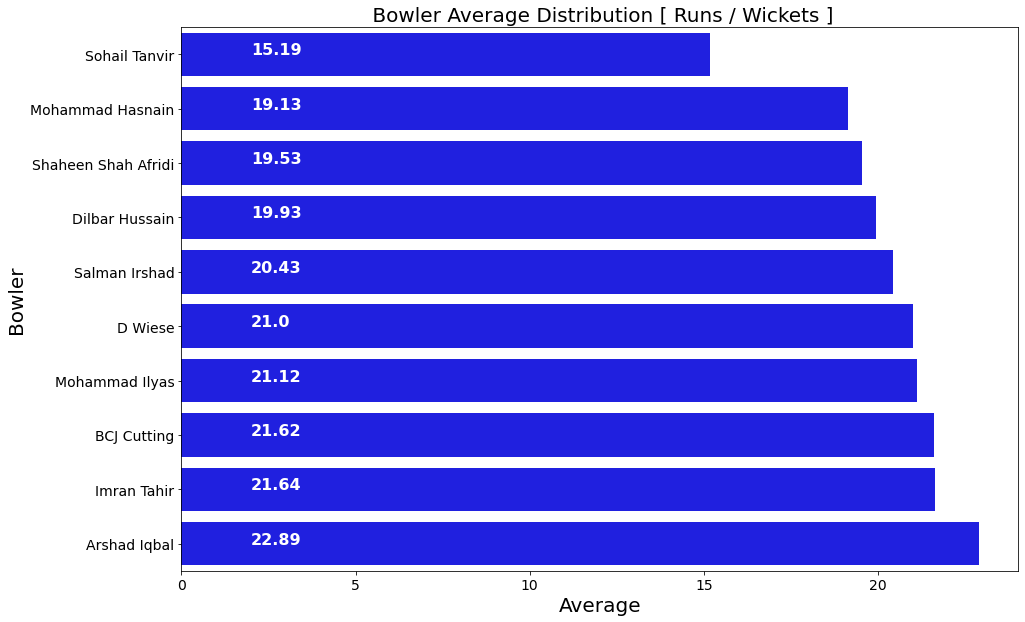

In [17]:
bowler_stats = bowler_stats.sort_values(by = "average",ascending = True)
xlabel_name = "Average"
ylabel_name = "Bowler"
title_name = " Bowler Average Distribution [ Runs / Wickets ]"

sns.barplot( x = "average" , y = "bowler" , data = bowler_stats.head(10), color = "blue")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(bowler_stats.head(10)["average"].values):
    ax.text(2, i, v,fontsize=16,color='white',weight='bold')

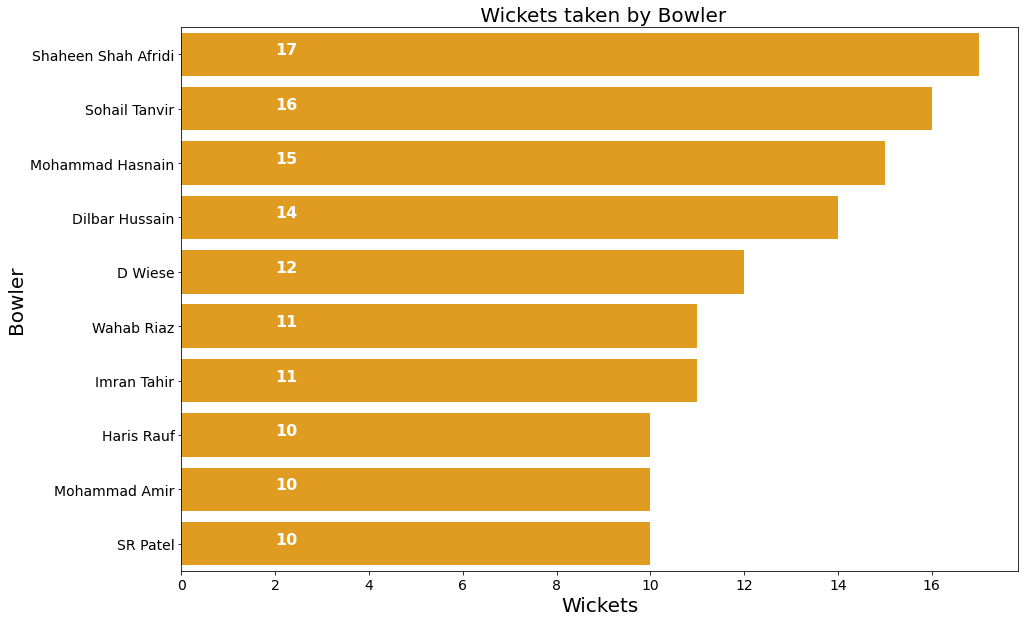

In [18]:
wickets_bowler = wickets_bowler.sort_values(by = "wickets",ascending = False)
xlabel_name = "Wickets"
ylabel_name = "Bowler"
title_name = " Wickets taken by Bowler"

sns.barplot( x = "wickets" , y = "bowler" , data = wickets_bowler.head(10), color = "orange")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(wickets_bowler.head(10)["wickets"].values):
    ax.text(2, i, v,fontsize=16,color='white',weight='bold')

In [19]:
bowler_stats["strike_rate"] = round(bowler_stats["deliveries"] / bowler_stats["wickets"],2)

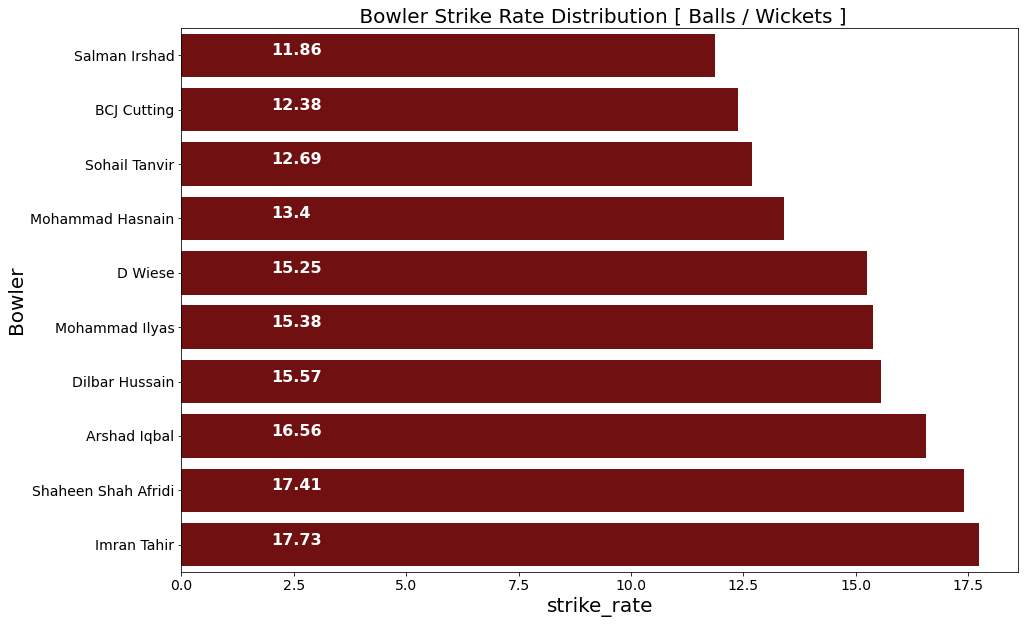

In [20]:
bowler_stats = bowler_stats.sort_values(by = "strike_rate",ascending = True)
xlabel_name = "strike_rate"
ylabel_name = "Bowler"
title_name = " Bowler Strike Rate Distribution [ Balls / Wickets ]"

sns.barplot( x = "strike_rate" , y = "bowler" , data = bowler_stats.head(10), color = "maroon")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(bowler_stats.head(10)["strike_rate"].values):
    ax.text(2, i, v,fontsize=16,color='white',weight='bold')

In [21]:
bowler_stats["econ"] = round((bowler_stats["runs_conceded_bowler"] / bowler_stats["deliveries"])*6,2)

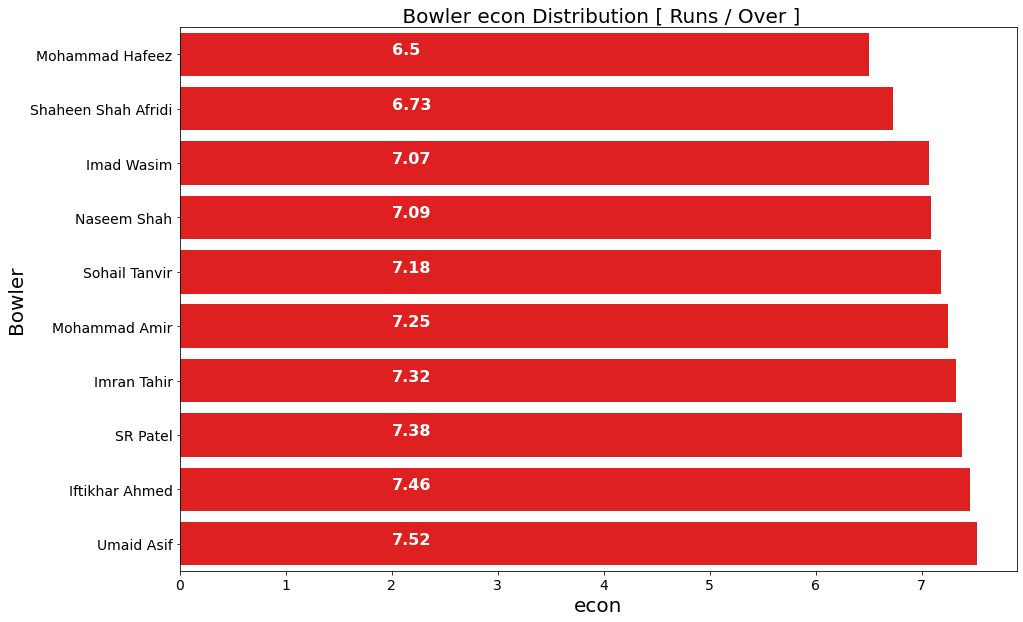

In [22]:
bowler_stats = bowler_stats.sort_values(by = "econ",ascending = True)
xlabel_name = "econ"
ylabel_name = "Bowler"
title_name = " Bowler econ Distribution [ Runs / Over ]"

sns.barplot( x = "econ" , y = "bowler" , data = bowler_stats.head(10), color = "red")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(bowler_stats.head(10)["econ"].values):
    ax.text(2, i, v,fontsize=16,color='white',weight='bold')

In [23]:
bowler_stats["deliveries"].median()

154.0

In [24]:
bowler_stats.sort_values(by="wickets",ascending = False)


,bowler,runs_conceded_bowler,deliveries,wickets,average,strike_rate,econ
58,Shaheen Shah Afridi,332.0,296,17.0,19.53,17.41,6.73
62,Sohail Tanvir,243.0,203,16.0,15.19,12.69,7.18
40,Mohammad Hasnain,287.0,201,15.0,19.13,13.40,8.57
18,Dilbar Hussain,279.0,218,14.0,19.93,15.57,7.68
15,D Wiese,252.0,183,12.0,21.00,15.25,8.26
28,Imran Tahir,238.0,195,11.0,21.64,17.73,7.32
70,Wahab Riaz,292.0,226,11.0,26.55,20.55,7.75
37,Mohammad Amir,336.0,278,10.0,33.60,27.80,7.25
55,SR Patel,235.0,191,10.0,23.50,19.10,7.38
23,Haris Rauf,302.0,191,10.0,30.20,19.10,9.49


In [25]:
bowler_stats.columns

Index(['bowler', 'runs_conceded_bowler', 'deliveries', 'wickets', 'average',
       'strike_rate', 'econ'],
      dtype='object')

In [26]:
bowler_stats = bowler_stats[bowler_stats["deliveries"] > 50]

In [27]:
bowler_all_stats_4 = bowler_stats[['wickets', 'average','strike_rate', 'econ']]

In [28]:
bowler_all_stats_4 = bowler_all_stats_4.fillna(0)
bowler_all_stats_4.index =bowler_stats.bowler

In [29]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(bowler_all_stats_4), index=bowler_all_stats_4.index, columns=bowler_all_stats_4.columns)

In [33]:
X.sort_values(by="wickets",ascending = False)


,wickets,average,strike_rate,econ
bowler,,,,
Shaheen Shah Afridi,2.447918,-0.954027,-0.507477,-1.418981
Sohail Tanvir,2.184625,-1.409227,-1.115462,-0.998215
Mohammad Hasnain,1.921331,-0.995981,-1.024006,0.301486
Dilbar Hussain,1.658038,-0.912073,-0.744488,-0.530696
D Wiese,1.131451,-0.799846,-0.785708,0.011625
Imran Tahir,0.868157,-0.732720,-0.466258,-0.867310
Wahab Riaz,0.868157,-0.217735,-0.103013,-0.465244
Haris Rauf,0.604863,0.165094,-0.289788,1.161720
Mohammad Amir,0.604863,0.521703,0.830861,-0.932762


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [35]:
from sklearn.decomposition import PCA

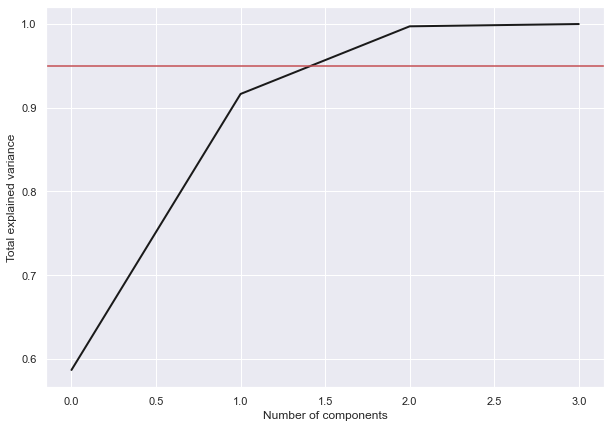

In [36]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.axhline(0.95, c='r')
plt.show();

In [37]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1','PC2','PC3','PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
bowler,,,,
Mohammad Hafeez,-3.411217,-0.304473,0.711001,0.343982
Shaheen Shah Afridi,1.212498,-2.767287,-0.195207,0.085867
Imad Wasim,-1.131680,-0.662386,0.494662,0.061357
Naseem Shah,-1.311540,-0.277165,0.803066,0.009103
Sohail Tanvir,1.943654,-2.284910,0.018336,-0.015829


In [39]:
df_plot = df_plot.reset_index()

In [40]:
df_plot.sort_values(by = ['PC1'],ascending = False).head(15)
df_plot.to_clipboard(excel=True)

In [41]:



df_plot.sort_values(by = ['PC1'],ascending = True).head(15)

df_plot[df_plot.select_dtypes(include=['number']).columns] *= -1

df_plot.sort_values(by = ['PC1'],ascending = False).head(15)


,index,bowler,PC1,PC2,PC3,PC4
17,-17,Mohammad Irfan,3.459269,-0.620038,0.794452,-0.062523
8,-8,Iftikhar Ahmed,3.459216,-0.566845,-0.101698,-0.113859
0,0,Mohammad Hafeez,3.411217,0.304473,-0.711001,-0.343982
26,-26,Fawad Ahmed,1.715290,-0.871680,0.263170,0.085569
3,-3,Naseem Shah,1.311540,0.277165,-0.803066,-0.009103
29,-29,Umer Khan,1.138066,-1.192293,0.349734,0.129983
2,-2,Imad Wasim,1.131680,0.662386,-0.494662,-0.061357
27,-27,Mohammad Amir Khan,1.046638,-1.108950,-0.198932,0.143498
5,-5,Mohammad Amir,0.976395,1.091455,0.188189,-0.135542
18,-18,Mohammad Nawaz (3),0.962993,-0.201886,-0.016169,0.040634


In [42]:
df_plot

,index,bowler,PC1,PC2,PC3,PC4
0,0,Mohammad Hafeez,3.411217,0.304473,-0.711001,-0.343982
1,-1,Shaheen Shah Afridi,-1.212498,2.767287,0.195207,-0.085867
2,-2,Imad Wasim,1.131680,0.662386,-0.494662,-0.061357
3,-3,Naseem Shah,1.311540,0.277165,-0.803066,-0.009103
4,-4,Sohail Tanvir,-1.943654,2.284910,-0.018336,0.015829
5,-5,Mohammad Amir,0.976395,1.091455,0.188189,-0.135542
6,-6,Imran Tahir,-0.744821,1.251690,-0.370834,0.034552
7,-7,SR Patel,-0.447189,1.022022,-0.389099,0.032236
8,-8,Iftikhar Ahmed,3.459216,-0.566845,-0.101698,-0.113859
9,-9,Umaid Asif,-0.276241,0.555140,-0.612529,0.075925


In [38]:
bowler_team = all_data_2020.groupby(['bowler'])["bowling_team"].unique()\
.reset_index(name = 'bowling_team').sort_values( by = 'bowling_team',ascending = False)

bowler_team['team'] = [''.join(map(str, l)) for l in bowler_team['bowling_team']]
bowler_team.drop("bowling_team",axis=1,inplace = True)
bowler_team

df_plot = df_plot.merge(bowler_team,how="right")
df_plot = df_plot[df_plot['PC1'].notna()]

df_plot.sort_values('PC1',ascending=False)

df_plot.to_csv('bowlers_pca_20220.csv',index=False)

average_pca_team = pd.DataFrame()

average_pca_team = df_plot.groupby('team', as_index=False)['PC1'].mean()

average_pca_team.to_csv('PCA_2020_Bowlers.csv', index=False)

# PCA

In [39]:
bowler_all_stats_4

,wickets,average,strike_rate,econ
bowler,,,,
Mohammad Hafeez,3.0,43.33,40.00,6.50
Shaheen Shah Afridi,17.0,19.53,17.41,6.73
Imad Wasim,7.0,32.14,27.29,7.07
Naseem Shah,5.0,32.40,27.40,7.09
Sohail Tanvir,16.0,15.19,12.69,7.18
Mohammad Amir,10.0,33.60,27.80,7.25
Imran Tahir,11.0,21.64,17.73,7.32
SR Patel,10.0,23.50,19.10,7.38
Iftikhar Ahmed,2.0,48.50,39.00,7.46


## Scale X

In [40]:
X_std = pd.DataFrame(scale(bowler_all_stats_4), index=bowler_all_stats_4.index, columns=bowler_all_stats_4.columns)

In [41]:
X_std

,wickets,average,strike_rate,econ
bowler,,,,
Mohammad Hafeez,-1.238191,1.542232,2.402346,-1.634040
Shaheen Shah Afridi,2.447918,-0.954027,-0.507477,-1.418981
Imad Wasim,-0.185017,0.368571,0.765168,-1.101069
Naseem Shah,-0.711604,0.395841,0.779337,-1.082368
Sohail Tanvir,2.184625,-1.409227,-1.115462,-0.998215
Mohammad Amir,0.604863,0.521703,0.830861,-0.932762
Imran Tahir,0.868157,-0.732720,-0.466258,-0.867310
SR Patel,0.604863,-0.537634,-0.289788,-0.811207
Iftikhar Ahmed,-1.501485,2.084487,2.273535,-0.736405


In [42]:
X_std["wickets"].mean() , X_std["wickets"].std() 

(3.600723323108616e-17, 1.0137937550497031)

# Covariance Matrix

In [43]:
cov_mat = np.cov(X_std.T)
cov_mat

array([[ 1.02777778, -0.43668125, -0.38194108, -0.31229604],
       [-0.43668125,  1.02777778,  0.97768462, -0.30167254],
       [-0.38194108,  0.97768462,  1.02777778, -0.53731353],
       [-0.31229604, -0.30167254, -0.53731353,  1.02777778]])

# Eigendecomposition on the covariance matrix

In [44]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.30321863 -0.70394288  0.6349535   0.09673124]
 [-0.62252482  0.0875006   0.48669879 -0.60657298]
 [-0.64729298 -0.06858025  0.11885401  0.74978815]
 [ 0.31864261  0.70150183  0.58807488  0.24602848]]

Eigenvalues 
[2.41147202 1.3560608  0.33232383 0.01125445]


In [45]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.411472022247243
1.3560608029378403
0.33232383400409976
0.011254451921929346


# Projection Onto the New Feature Space

In [46]:
eig_pairs[0]

(2.411472022247243,
 array([ 0.30321863, -0.62252482, -0.64729298,  0.31864261]))

In [47]:
eig_pairs[0][1]

array([ 0.30321863, -0.62252482, -0.64729298,  0.31864261])

In [48]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1) ,
                      eig_pairs[2][1].reshape(4,1) ,
                      eig_pairs[3][1].reshape(4,1) 
                     
                     ))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.30321863 -0.70394288  0.6349535   0.09673124]
 [-0.62252482  0.0875006   0.48669879 -0.60657298]
 [-0.64729298 -0.06858025  0.11885401  0.74978815]
 [ 0.31864261  0.70150183  0.58807488  0.24602848]]


In [49]:
w_df = pd.DataFrame(matrix_w)

In [50]:
w_df

,0,1,2,3
0,0.303219,-0.703943,0.634954,0.096731
1,-0.622525,0.087501,0.486699,-0.606573
2,-0.647293,-0.068580,0.118854,0.749788
3,0.318643,0.701502,0.588075,0.246028


In [51]:
w_df.rename(columns = {0: 'PC1', 1: 'PC2',2: 'PC3', 3: 'PC4'}, inplace = True)

In [52]:
w_df

,PC1,PC2,PC3,PC4
0,0.303219,-0.703943,0.634954,0.096731
1,-0.622525,0.087501,0.486699,-0.606573
2,-0.647293,-0.068580,0.118854,0.749788
3,0.318643,0.701502,0.588075,0.246028


In [53]:
bowlers = ["wickets","average","strike_rate","econ"]

In [54]:
component_number = "PC1"

In [55]:
components_n = pd.DataFrame()
components_n["value"] =w_df[component_number]
components_n["bowlers"] = bowlers

In [56]:
def plot_component_number(component_number,color = "blue"):
    components_n = pd.DataFrame()
    components_n["value"] =w_df[component_number]
    components_n["bowlers"] = bowlers
    sns.barplot( y = 'value', x = 'bowlers', data = components_n, color=color)

    xlabel_name = "Component"
    ylabel_name = "Value"

    fig=plt.gcf()
    fig.set_size_inches(15,10)

    plt.tick_params(labelsize=14)
    plt.title(title_name,fontsize = 20)
    plt.xlabel(xlabel_name,fontsize = 20)
    plt.ylabel(ylabel_name,fontsize = 20)
    plt.xticks(rotation=90)

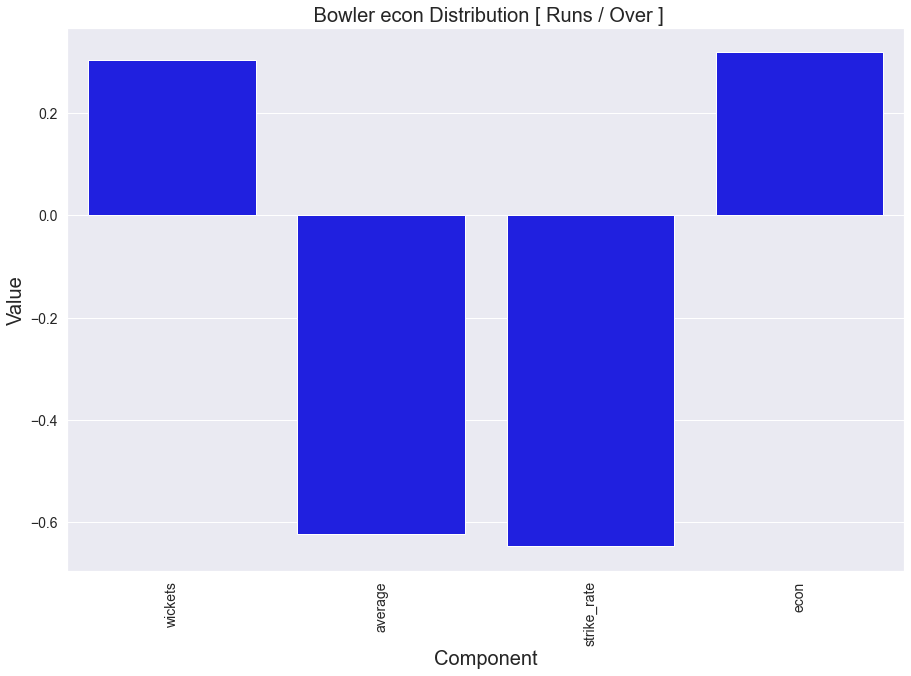

In [57]:
plot_component_number("PC1")

In [58]:
Y = X_std.dot(matrix_w)

In [59]:
Y

,0,1,2,3
bowler,,,,
Mohammad Hafeez,-3.411217,-0.304473,-0.711001,0.343982
Shaheen Shah Afridi,1.212498,-2.767287,0.195207,0.085867
Imad Wasim,-1.131680,-0.662386,-0.494662,0.061357
Naseem Shah,-1.311540,-0.277165,-0.803066,0.009103
Sohail Tanvir,1.943654,-2.284910,-0.018336,-0.015829
Mohammad Amir,-0.976395,-1.091455,0.188189,0.135542
Imran Tahir,0.744821,-1.251690,-0.370834,-0.034552
SR Patel,0.447189,-1.022022,-0.389099,-0.032236
Iftikhar Ahmed,-3.459216,0.566845,-0.101698,0.113859


In [60]:
Y_1 = Y.reset_index()


In [61]:
Y_1

,bowler,0,1,2,3
0,Mohammad Hafeez,-3.411217,-0.304473,-0.711001,0.343982
1,Shaheen Shah Afridi,1.212498,-2.767287,0.195207,0.085867
2,Imad Wasim,-1.131680,-0.662386,-0.494662,0.061357
3,Naseem Shah,-1.311540,-0.277165,-0.803066,0.009103
4,Sohail Tanvir,1.943654,-2.284910,-0.018336,-0.015829
5,Mohammad Amir,-0.976395,-1.091455,0.188189,0.135542
6,Imran Tahir,0.744821,-1.251690,-0.370834,-0.034552
7,SR Patel,0.447189,-1.022022,-0.389099,-0.032236
8,Iftikhar Ahmed,-3.459216,0.566845,-0.101698,0.113859
9,Umaid Asif,0.276241,-0.555140,-0.612529,-0.075925


In [62]:
Y_1.rename(columns = {0: 'PC1', 1: 'PC2'}, inplace = True)
Y_1.sort_values(by = 'PC1',ascending = True).head(15)

,bowler,PC1,PC2,2,3
17,Mohammad Irfan,-3.459269,0.620038,0.794452,0.062523
8,Iftikhar Ahmed,-3.459216,0.566845,-0.101698,0.113859
0,Mohammad Hafeez,-3.411217,-0.304473,-0.711001,0.343982
26,Fawad Ahmed,-1.715290,0.871680,0.263170,-0.085569
3,Naseem Shah,-1.311540,-0.277165,-0.803066,0.009103
29,Umer Khan,-1.138066,1.192293,0.349734,-0.129983
2,Imad Wasim,-1.131680,-0.662386,-0.494662,0.061357
27,Mohammad Amir Khan,-1.046638,1.108950,-0.198932,-0.143498
5,Mohammad Amir,-0.976395,-1.091455,0.188189,0.135542
18,Mohammad Nawaz (3),-0.962993,0.201886,-0.016169,-0.040634


In [63]:
df_plot.sort_values(by = 'PC1',ascending = False).head(15)

,bowler,PC1,PC2,PC3,PC4,team
28,Mohammad Irfan,3.459269,-0.620038,0.794452,-0.062523,Multan Sultans
61,Iftikhar Ahmed,3.459216,-0.566845,-0.101698,-0.113859,Karachi Kings
48,Mohammad Hafeez,3.411217,0.304473,-0.711001,-0.343982,Lahore Qalandars
2,Fawad Ahmed,1.715290,-0.871680,0.263170,0.085569,Quetta Gladiators
5,Naseem Shah,1.311540,0.277165,-0.803066,-0.009103,Quetta Gladiators
52,Umer Khan,1.138066,-1.192293,0.349734,0.129983,Karachi Kings
62,Imad Wasim,1.131680,0.662386,-0.494662,-0.061357,Karachi Kings
11,Mohammad Amir Khan,1.046638,-1.108950,-0.198932,0.143498,Peshawar Zalmi
64,Mohammad Amir,0.976395,1.091455,0.188189,-0.135542,Karachi Kings
9,Mohammad Nawaz (3),0.962993,-0.201886,-0.016169,0.040634,Quetta Gladiators


Eigenvectors 
[[ 0.30321863 -0.70394288  0.6349535   0.09673124]
 [-0.62252482  0.0875006   0.48669879 -0.60657298]
 [-0.64729298 -0.06858025  0.11885401  0.74978815]
 [ 0.31864261  0.70150183  0.58807488  0.24602848]]

Eigenvalues 
[2.41147202 1.3560608  0.33232383 0.01125445]
Eigenvalues in descending order:
2.411472022247243
1.3560608029378403
0.33232383400409976
0.011254451921929346
Matrix W:
 [[ 0.30321863 -0.70394288  0.6349535   0.09673124]
 [-0.62252482  0.0875006   0.48669879 -0.60657298]
 [-0.64729298 -0.06858025  0.11885401  0.74978815]
 [ 0.31864261  0.70150183  0.58807488  0.24602848]]


,bowler,PC1,PC2,PC3,PC4,team
47,Usman Shinwari,-3.946662,-3.362274,-1.391921,-0.267548,Lahore Qalandars
7,Mohammad Hasnain,-1.961505,1.157937,0.790802,-0.096374,Quetta Gladiators
29,Sohail Tanvir,-1.943654,2.284910,-0.018336,0.015829,Multan Sultans
3,BCJ Cutting,-1.894191,-1.424157,0.782295,-0.100554,Quetta Gladiators
41,Salman Irshad,-1.893700,-1.511343,0.469427,-0.068365,Lahore Qalandars
40,Dilbar Hussain,-1.383335,1.568198,0.208297,-0.024848,Lahore Qalandars
44,D Wiese,-1.353288,0.804425,0.242586,-0.008357,Lahore Qalandars
50,Shaheen Shah Afridi,-1.212498,2.767287,0.195207,-0.085867,Lahore Qalandars
30,Mohammad Ilyas,-1.009313,0.076216,-0.429012,0.093197,Multan Sultans
56,Arshad Iqbal,-0.893070,0.216384,-0.120421,0.052569,Karachi Kings


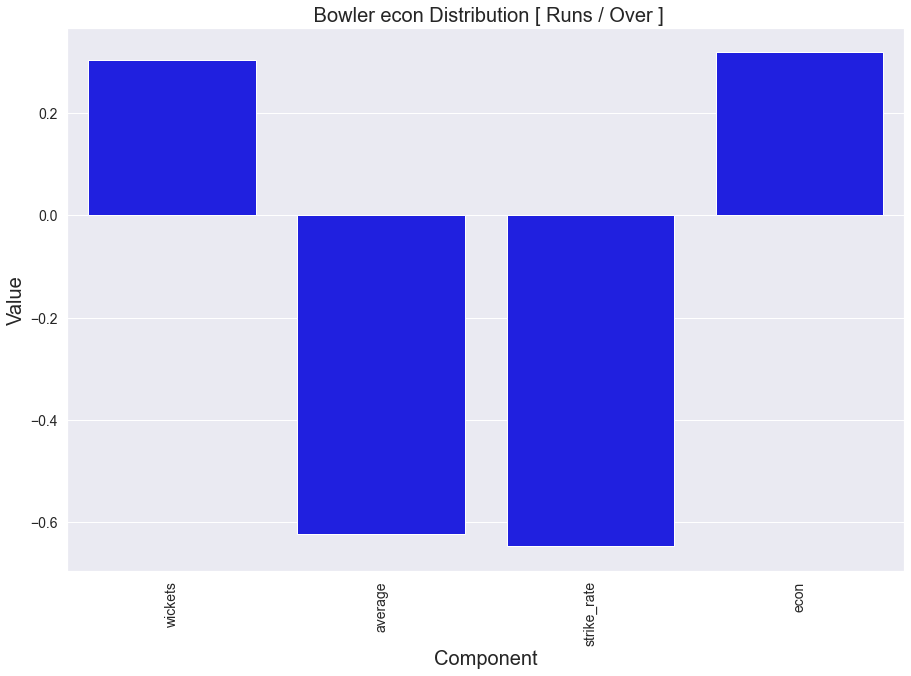

In [64]:
bowler_all_stats_4

## Scale X

X_std = pd.DataFrame(scale(bowler_all_stats_4), index=bowler_all_stats_4.index, columns=bowler_all_stats_4.columns)

X_std

X_std["wickets"].mean() , X_std["wickets"].std() 

# Covariance Matrix

cov_mat = np.cov(X_std.T)
cov_mat

# Eigendecomposition on the covariance matrix

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

# Projection Onto the New Feature Space

eig_pairs[0]

eig_pairs[0][1]

matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1) ,
                      eig_pairs[2][1].reshape(4,1) ,
                      eig_pairs[3][1].reshape(4,1) 
                     
                     ))

print('Matrix W:\n', matrix_w)

w_df = pd.DataFrame(matrix_w)

w_df

w_df.rename(columns = {0: 'PC1', 1: 'PC2',2: 'PC3', 3: 'PC4'}, inplace = True)

w_df

bowlers = ["wickets","average","strike_rate","econ"]

component_number = "PC1"

components_n = pd.DataFrame()
components_n["value"] =w_df[component_number]
components_n["bowlers"] = bowlers

def plot_component_number(component_number,color = "blue"):
    components_n = pd.DataFrame()
    components_n["value"] =w_df[component_number]
    components_n["bowlers"] = bowlers
    sns.barplot( y = 'value', x = 'bowlers', data = components_n, color=color)

    xlabel_name = "Component"
    ylabel_name = "Value"

    fig=plt.gcf()
    fig.set_size_inches(15,10)

    plt.tick_params(labelsize=14)
    plt.title(title_name,fontsize = 20)
    plt.xlabel(xlabel_name,fontsize = 20)
    plt.ylabel(ylabel_name,fontsize = 20)
    plt.xticks(rotation=90)

plot_component_number("PC1")

Y = X_std.dot(matrix_w)

Y

Y_1 = Y.reset_index()


Y_1

Y_1.rename(columns = {0: 'PC1', 1: 'PC2'}, inplace = True)
Y_1.sort_values(by = 'PC1',ascending = True).head(15)

df_plot.sort_values(by = 'PC1',ascending = True).head(15)